# Decision Trees Classifier (Mask, No Mask, Incorrect Mask)

## Imports

In [ ]:
# Import Metrics, Classifier and Graphing Packages
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

import seaborn as sns # for confusion matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # to plot image, graph

import pickle
import time # for computation time assessment
%matplotlib inline

## Prepare Dataset

### Pickle Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Face-Mask-Dataset

/content/drive/.shortcut-targets-by-id/1PPafcxxA7mViQpMt0wWWKP6k38Lp7jyJ/Face-Mask-Dataset


In [ ]:
%cd /content/drive/MyDrive/data-face-mask/Face-Mask-Dataset

/content/drive/MyDrive/data-face-mask/Face-Mask-Dataset


In [ ]:
# LOAD FEATURES AND LABELS FROM PICKLE

pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in) # 3D Feature set

pickle_in = open("y.pickle", "rb")
y = pickle.load(pickle_in) # 1D Target set

pickle_in = open("data.pickle", "rb")
data = pickle.load(pickle_in) # 2-D Feature Set, Data matrix will serve as X

### Dataset Classification Distribution

In [ ]:
print('# of Samples:', len(y))
print('# of Without A Mask:', (y == 0).sum())
print('# of Incorrectly Worn Mask:', (y == 1).sum())
print('# of With A Mask:', (y == 2).sum())

# of Samples: 17836
# of Without A Mask: 5909
# of Incorrectly Worn Mask: 6044
# of With A Mask: 5883


### Convert Numpy to Dataframe

In [ ]:
data.shape

(17836, 4096)

In [ ]:
# Get Column Names
cols = []
for i in range(0, len(data[0])):
    cols.append("P" + str(i))

# Convert to Dataframe
numpy_data = data
X = pd.DataFrame(data=numpy_data, columns=[cols])
print(X.head())

y = pd.DataFrame(data=y, columns=["Mask_Target"])
print(y.head())

    P0   P1   P2   P3   P4   P5   P6  ... P4089 P4090 P4091 P4092 P4093 P4094 P4095
0  147  148  147  146  146  146  145  ...   158   162   147   151   138   155   154
1  244  215  196  173  139  141  132  ...   181   165   160   168   164   159   146
2   90   93   90   93   85   80   75  ...    93    99   136    86    35    29    34
3   79   79   81   82   81   86   85  ...   245   240   241   240   237   232   227
4  128  115  107  137  101   88   79  ...    82    71    66    78    79    96    74

[5 rows x 4096 columns]
   Mask_Target
0            0
1            0
2            0
3            0
4            0


### Data Shape

In [ ]:
# Shape of Feature and Target Sets
# There are 17,687 samples
# See Data preprocessing for more information

print('\nImage Data Shape:', X.shape) # Feature sets are 64X64 images flatten to a 4096 feature vector
print('Image Data Shape Features:', data.shape)
print('Image Data Shape Target:', y.shape)


Image Data Shape: (17836, 4096)
Image Data Shape Features: (17836, 4096)
Image Data Shape Target: (17836, 1)


### Normalize the Data

In [ ]:
# Normalize the pixel values
X = X / 255.0

### Split Train + Test, random_state

In [ ]:
# Split our data into testing and training.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

# Print the length and width of our testing data.
print('Length of our Training data: ', len(X_train), '\nLength of our Testing data: ', len(X_test))

Length of our Training data:  14268 
Length of our Testing data:  3568


## Decision Trees Classifier
Build and Train Decision Trees model, No Hyperparameter Tuning

#### Fit Model

In [ ]:
# Initialize Decision Trees model, No hyperparameter Tuning
decision_trees = DecisionTreeClassifier()

# Use training data to fit Decision Trees model
decision_trees.fit(X_train, y_train.values.ravel())

# Predict Train Data Labels
predictions_set = decision_trees.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


#### Predict

In [ ]:
%%time
# Predict Train Data Labels
predictions_set = decision_trees.predict(X_test)

CPU times: user 67.5 ms, sys: 1.96 ms, total: 69.4 ms
Wall time: 71.9 ms


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


#### Pickle Predictions

In [ ]:
%cd pretrain-model

/content/drive/My Drive/data-face-mask/Face-Mask-Dataset/pretrain-model


In [ ]:
# pickle_out = open("predictions_set1_dt.pickle", "wb")
# pickle.dump(predictions_set, pickle_out)
# pickle_out.close()

### Performance Metrics, No Hyperparameter Tuning

#### Confusion Matrix

Text(0.5, 1.0, 'Accuracy Score, No Hyperparameter Tuning: 0.8500560538116592')

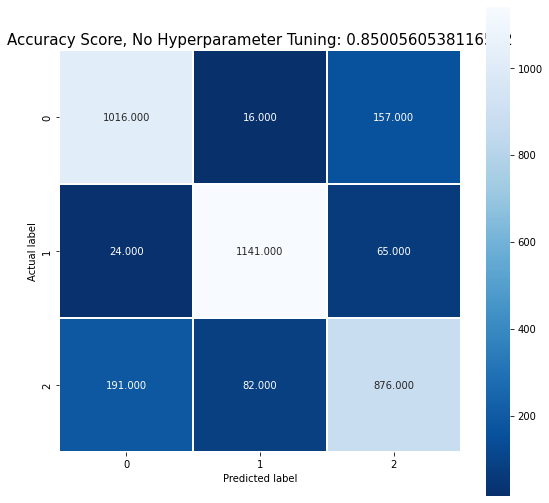

In [ ]:
# Calculate Confusion Matrix
cm = confusion_matrix(y_test, predictions_set)

plt.figure(figsize=(9,9))
# Heatmap visualization of accuracy
sns.heatmap(cm,annot=True, fmt='.3f', linewidths=.5, square=True,cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
title = 'Accuracy Score, No Hyperparameter Tuning: {0}'.format(accuracy_score(y_test, predictions_set))
plt.title(title,size=15)

#### Precision, Recall, F1 Score

In [ ]:
print('Decision Trees Precision: %.3f' % precision_score(y_test, predictions_set, average='micro'))
print('Decision Trees Recall: %.3f' % recall_score(y_test, predictions_set, average='micro'))
print('Decision Trees F1 Score: %.3f' % f1_score(y_test, predictions_set, average='micro'))

Decision Trees Precision: 0.850
Decision Trees Recall: 0.850
Decision Trees F1 Score: 0.850


#### Classification Report

In [ ]:
# CLASS 0: NO MASK
# CLASS 1: INCORRECT WEAR OF MASK
# CLASS 2: CORRECT WEAR OF MASK

print("\nClassification Report\n", classification_report(y_test, predictions_set))


Classification Report
               precision    recall  f1-score   support

           0       0.83      0.85      0.84      1189
           1       0.92      0.93      0.92      1230
           2       0.80      0.76      0.78      1149

    accuracy                           0.85      3568
   macro avg       0.85      0.85      0.85      3568
weighted avg       0.85      0.85      0.85      3568



### Visualization of Trees

[Text(106.26216804885082, 214.78829268292682, 'X[1944] <= 0.351\ngini = 0.667\nsamples = 14268\nvalue = [4720, 4814, 4734]'),
 Text(31.286039495044427, 209.48487804878047, 'X[3292] <= 0.422\ngini = 0.364\nsamples = 5127\nvalue = [294, 3992, 841]'),
 Text(10.634133629528366, 204.18146341463415, 'X[3744] <= 0.202\ngini = 0.571\nsamples = 665\nvalue = [196, 91, 378]'),
 Text(5.034586466165414, 198.8780487804878, 'X[2781] <= 0.625\ngini = 0.256\nsamples = 195\nvalue = [17, 11, 167]'),
 Text(3.6615174299384825, 193.57463414634145, 'X[3999] <= 0.288\ngini = 0.179\nsamples = 182\nvalue = [17, 1, 164]'),
 Text(2.2884483937115516, 188.2712195121951, 'X[735] <= 0.292\ngini = 0.098\nsamples = 155\nvalue = [8, 0, 147]'),
 Text(1.8307587149692413, 182.96780487804878, 'X[604] <= 0.249\ngini = 0.308\nsamples = 42\nvalue = [8, 0, 34]'),
 Text(0.9153793574846206, 177.66439024390243, 'X[3876] <= 0.3\ngini = 0.059\nsamples = 33\nvalue = [1, 0, 32]'),
 Text(0.4576896787423103, 172.3609756097561, 'gini = 0

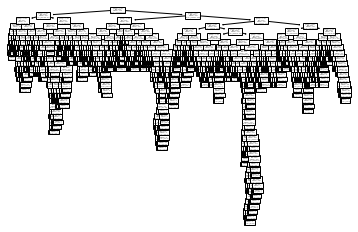

In [ ]:
# Import Tree Plot for Visual Representation of Tree
from sklearn.tree import plot_tree
plot_tree(decision_trees) 

In [ ]:
from sklearn import tree

In [ ]:
text_representation = tree.export_text(decision_trees)
print(text_representation)

|--- feature_1944 <= 0.35
|   |--- feature_3292 <= 0.42
|   |   |--- feature_3744 <= 0.20
|   |   |   |--- feature_2781 <= 0.63
|   |   |   |   |--- feature_3999 <= 0.29
|   |   |   |   |   |--- feature_735 <= 0.29
|   |   |   |   |   |   |--- feature_604 <= 0.25
|   |   |   |   |   |   |   |--- feature_3876 <= 0.30
|   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |   |--- feature_3876 >  0.30
|   |   |   |   |   |   |   |   |--- feature_2899 <= 0.30
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_2899 >  0.30
|   |   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |--- feature_604 >  0.25
|   |   |   |   |   |   |   |--- feature_3062 <= 0.62
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_3062 >  0.62
|   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- feature_735 >  0.29
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_3999 

In [ ]:
# %cd /content/drive/MyDrive/data-face-mask/Face-Mask-Dataset/pretrain-model/Decision-tree

In [ ]:
# lưu cây vào tệp
with open("decistion_tree.log", "w") as fout:
    fout.write(text_representation)

## Dimensionality Reduction

### Principal Component Analysis, Keep 90% of variance

In [ ]:
from sklearn.decomposition import PCA # Dimensionality Reduction

In [ ]:
# Dimensionality Reduction with Principal Component Analysis (PCA)
pca = PCA(0.90) # Preserve 90% of the variance

X_transformed = pca.fit_transform(X_train) 
X_test_transformed = pca.transform(X_test)

# Training set shape after Principal Component Analysis form
print(X_transformed.shape)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


(14268, 154)


In [ ]:
# Notice we lose 3,943 features using PCA, while preserving 90% variance
print(X_train.shape)

(14268, 4096)


In [ ]:
# Initialize Decision Trees model for PCA instance
decision_trees_pca = DecisionTreeClassifier()

# Use training data to fit Decision Trees model with transformed X_train
decision_trees_pca.fit(X_transformed, y_train.values.ravel())

DecisionTreeClassifier()

In [ ]:
%%time
# make prediction on entire train data
predictions_set_pca = decision_trees_pca.predict(X_transformed)
print("Accuracy Train PCA:", accuracy_score(y_train, predictions_set_pca))

Accuracy Train PCA: 1.0
CPU times: user 11.8 ms, sys: 2 ms, total: 13.8 ms
Wall time: 25.7 ms


In [ ]:
%%time
# make prediction on entire test data
predictions_set_pca = decision_trees_pca.predict(X_test_transformed)
print("Accuracy Train PCA:", accuracy_score(y_test, predictions_set_pca))

Accuracy Train PCA: 0.772982062780269
CPU times: user 4.37 ms, sys: 984 µs, total: 5.36 ms
Wall time: 10.3 ms


#### PCA Classification Report


PCA Classification Report
               precision    recall  f1-score   support

           0       0.79      0.78      0.78      1189
           1       0.84      0.83      0.84      1230
           2       0.68      0.71      0.69      1149

    accuracy                           0.77      3568
   macro avg       0.77      0.77      0.77      3568
weighted avg       0.77      0.77      0.77      3568



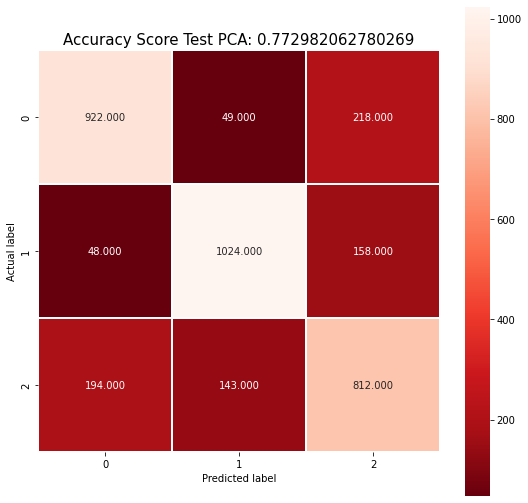

In [ ]:
# Calculate Confusion Matrix for 
cm = confusion_matrix(y_test, predictions_set_pca)

plt.figure(figsize=(9,9))

# Heatmap visualization of accuracy
sns.heatmap(cm,annot=True, fmt='.3f', linewidths=.5, square=True,cmap='Reds_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
title = 'Accuracy Score Test PCA: {0}'.format(accuracy_score(y_test, predictions_set_pca))
plt.title(title,size=15)

print("\nPCA Classification Report\n", classification_report(y_test, predictions_set_pca))

### Max Depths [Decision Trees Hyperparameter Tuning]
Xác định độ sâu của cây.
> Lưu ý: Khi độ sâu tăng lên, khả năng trang bị quá mức dữ liệu sẽ tăng lên

In [ ]:
max_depths = np.linspace(1, 32, 32, endpoint=True)

for depth in max_depths:
    # Initialize Classifier with max_depth
    dt = DecisionTreeClassifier(max_depth=depth)
    # Fit Classifier 
    dt.fit(X_train, y_train)
    # Train Classifier Prediction
    train_pred = dt.predict(X_train)
    # Test Classifier Prediction
    y_pred = dt.predict(X_test)
    
    print("For max depth:", max_depths)
    print('===== Accuracy Train: %.3f' % accuracy_score(y_train, train_pred))
    print('===== Accuracy Test: %.3f' % accuracy_score(y_test, y_pred))
    print("\nClassification Report\n", classification_report(y_test, y_pred))

#   Best Performing Depth 83.7%, max-depth=10

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max depth: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32.]
===== Accuracy Train: 0.590
===== Accuracy Test: 0.595

Classification Report
               precision    recall  f1-score   support

           0       0.48      0.93      0.64      1189
           1       0.79      0.83      0.81      1230
           2       0.00      0.00      0.00      1149

    accuracy                           0.60      3568
   macro avg       0.43      0.59      0.48      3568
weighted avg       0.43      0.60      0.49      3568



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:

For max depth: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32.]
===== Accuracy Train: 0.694
===== Accuracy Test: 0.684

Classification Report
               precision    recall  f1-score   support

           0       0.56      0.82      0.67      1189
           1       0.89      0.81      0.85      1230
           2       0.65      0.41      0.50      1149

    accuracy                           0.68      3568
   macro avg       0.70      0.68      0.67      3568
weighted avg       0.70      0.68      0.68      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max depth: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32.]
===== Accuracy Train: 0.741
===== Accuracy Test: 0.732

Classification Report
               precision    recall  f1-score   support

           0       0.67      0.71      0.69      1189
           1       0.89      0.81      0.85      1230
           2       0.64      0.67      0.66      1149

    accuracy                           0.73      3568
   macro avg       0.74      0.73      0.73      3568
weighted avg       0.74      0.73      0.73      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max depth: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32.]
===== Accuracy Train: 0.779
===== Accuracy Test: 0.764

Classification Report
               precision    recall  f1-score   support

           0       0.73      0.78      0.75      1189
           1       0.85      0.88      0.86      1230
           2       0.70      0.62      0.66      1149

    accuracy                           0.76      3568
   macro avg       0.76      0.76      0.76      3568
weighted avg       0.76      0.76      0.76      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max depth: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32.]
===== Accuracy Train: 0.816
===== Accuracy Test: 0.800

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.71      0.76      1189
           1       0.93      0.89      0.91      1230
           2       0.68      0.79      0.73      1149

    accuracy                           0.80      3568
   macro avg       0.81      0.80      0.80      3568
weighted avg       0.81      0.80      0.80      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max depth: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32.]
===== Accuracy Train: 0.849
===== Accuracy Test: 0.823

Classification Report
               precision    recall  f1-score   support

           0       0.76      0.86      0.80      1189
           1       0.94      0.90      0.92      1230
           2       0.78      0.71      0.74      1149

    accuracy                           0.82      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.83      0.82      0.82      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max depth: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32.]
===== Accuracy Train: 0.880
===== Accuracy Test: 0.828

Classification Report
               precision    recall  f1-score   support

           0       0.79      0.83      0.81      1189
           1       0.93      0.91      0.92      1230
           2       0.76      0.73      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max depth: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32.]
===== Accuracy Train: 0.911
===== Accuracy Test: 0.840

Classification Report
               precision    recall  f1-score   support

           0       0.79      0.86      0.83      1189
           1       0.94      0.91      0.93      1230
           2       0.78      0.74      0.76      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.84      0.84      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max depth: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32.]
===== Accuracy Train: 0.934
===== Accuracy Test: 0.849

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.87      0.84      1189
           1       0.93      0.92      0.92      1230
           2       0.80      0.75      0.78      1149

    accuracy                           0.85      3568
   macro avg       0.85      0.85      0.85      3568
weighted avg       0.85      0.85      0.85      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max depth: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32.]
===== Accuracy Train: 0.957
===== Accuracy Test: 0.852

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.87      0.84      1189
           1       0.94      0.91      0.93      1230
           2       0.80      0.77      0.79      1149

    accuracy                           0.85      3568
   macro avg       0.85      0.85      0.85      3568
weighted avg       0.85      0.85      0.85      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


### Minimum Samples Splits [Decision Trees Hyperparameter Tuning]
Số lượng mẫu tối thiểu cần thiết để tách một nút. Nếu tăng, cây sẽ xem xét nhiều mẫu hơn tại mỗi nút quyết định. 

In [ ]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)

for split in min_samples_splits:
    # Initialize Classifier with minimum samples split
    dt = DecisionTreeClassifier(min_samples_split=split)
    # Fit Classifier 
    dt.fit(X_train, y_train)
    # Train Classifier Prediction
    train_pred = dt.predict(X_train)
    # Test Classifier Prediction
    y_pred = dt.predict(X_test)
    
    print("For min sample splits:", min_samples_splits)
    print('===== Accuracy Train: %.3f' % accuracy_score(y_train, train_pred))
    print('===== Accuracy Test: %.3f' % accuracy_score(y_test, y_pred))
    print("\nClassification Report\n", classification_report(y_test, y_pred))

#   Best Performing Minimum Sample Splits 74.8%, min sample splits = 0.2 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For min sample splits: [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
===== Accuracy Train: 0.767
===== Accuracy Test: 0.747

Classification Report
               precision    recall  f1-score   support

           0       0.84      0.59      0.70      1189
           1       0.82      0.88      0.85      1230
           2       0.62      0.76      0.68      1149

    accuracy                           0.75      3568
   macro avg       0.76      0.75      0.74      3568
weighted avg       0.76      0.75      0.75      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For min sample splits: [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
===== Accuracy Train: 0.761
===== Accuracy Test: 0.748

Classification Report
               precision    recall  f1-score   support

           0       0.84      0.60      0.70      1189
           1       0.83      0.87      0.85      1230
           2       0.62      0.76      0.68      1149

    accuracy                           0.75      3568
   macro avg       0.76      0.75      0.75      3568
weighted avg       0.76      0.75      0.75      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For min sample splits: [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
===== Accuracy Train: 0.754
===== Accuracy Test: 0.744

Classification Report
               precision    recall  f1-score   support

           0       0.76      0.68      0.71      1189
           1       0.83      0.88      0.85      1230
           2       0.64      0.67      0.66      1149

    accuracy                           0.74      3568
   macro avg       0.74      0.74      0.74      3568
weighted avg       0.74      0.74      0.74      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For min sample splits: [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
===== Accuracy Train: 0.720
===== Accuracy Test: 0.712

Classification Report
               precision    recall  f1-score   support

           0       0.67      0.71      0.69      1189
           1       0.79      0.83      0.81      1230
           2       0.66      0.59      0.62      1149

    accuracy                           0.71      3568
   macro avg       0.71      0.71      0.71      3568
weighted avg       0.71      0.71      0.71      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For min sample splits: [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
===== Accuracy Train: 0.674
===== Accuracy Test: 0.664

Classification Report
               precision    recall  f1-score   support

           0       0.56      0.82      0.67      1189
           1       0.79      0.83      0.81      1230
           2       0.68      0.33      0.44      1149

    accuracy                           0.66      3568
   macro avg       0.68      0.66      0.64      3568
weighted avg       0.68      0.66      0.64      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For min sample splits: [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
===== Accuracy Train: 0.674
===== Accuracy Test: 0.664

Classification Report
               precision    recall  f1-score   support

           0       0.56      0.82      0.67      1189
           1       0.79      0.83      0.81      1230
           2       0.68      0.33      0.44      1149

    accuracy                           0.66      3568
   macro avg       0.68      0.66      0.64      3568
weighted avg       0.68      0.66      0.64      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For min sample splits: [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
===== Accuracy Train: 0.590
===== Accuracy Test: 0.595

Classification Report
               precision    recall  f1-score   support

           0       0.48      0.93      0.64      1189
           1       0.79      0.83      0.81      1230
           2       0.00      0.00      0.00      1149

    accuracy                           0.60      3568
   macro avg       0.43      0.59      0.48      3568
weighted avg       0.43      0.60      0.49      3568



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:

For min sample splits: [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
===== Accuracy Train: 0.590
===== Accuracy Test: 0.595

Classification Report
               precision    recall  f1-score   support

           0       0.48      0.93      0.64      1189
           1       0.79      0.83      0.81      1230
           2       0.00      0.00      0.00      1149

    accuracy                           0.60      3568
   macro avg       0.43      0.59      0.48      3568
weighted avg       0.43      0.60      0.49      3568



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:

For min sample splits: [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
===== Accuracy Train: 0.590
===== Accuracy Test: 0.595

Classification Report
               precision    recall  f1-score   support

           0       0.48      0.93      0.64      1189
           1       0.79      0.83      0.81      1230
           2       0.00      0.00      0.00      1149

    accuracy                           0.60      3568
   macro avg       0.43      0.59      0.48      3568
weighted avg       0.43      0.60      0.49      3568



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:

For min sample splits: [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
===== Accuracy Train: 0.590
===== Accuracy Test: 0.595

Classification Report
               precision    recall  f1-score   support

           0       0.48      0.93      0.64      1189
           1       0.79      0.83      0.81      1230
           2       0.00      0.00      0.00      1149

    accuracy                           0.60      3568
   macro avg       0.43      0.59      0.48      3568
weighted avg       0.43      0.60      0.49      3568



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Minimum Samples Leaf [Decision Trees Hyperparameter Tuning]
Số lượng mẫu tối thiểu cần thiết cho mỗi nút lá.

In [ ]:
min_samples_leaves = np.linspace(0.1, 0.5, 5, endpoint=True)

for min_leaf in min_samples_leaves:
    # Initialize Classifier with minimum samples leaf
    dt = DecisionTreeClassifier(min_samples_leaf=min_leaf)
    # Fit Classifier 
    dt.fit(X_train, y_train)
    # Train Classifier Prediction
    train_pred = dt.predict(X_train)
    # Test Classifier Prediction
    y_pred = dt.predict(X_test)
    
    print("For min samples leafs:", min_leaf)
    print('===== Accuracy Train: %.3f' % accuracy_score(y_train, train_pred))
    print('===== Accuracy Test: %.3f' % accuracy_score(y_test, y_pred))
    print("\nClassification Report\n", classification_report(y_test, y_pred))

#   Best Performing Minimum Sample Leaf 71.2%, min sample splits = 0.1 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For min samples leafs: 0.1
===== Accuracy Train: 0.720
===== Accuracy Test: 0.712

Classification Report
               precision    recall  f1-score   support

           0       0.67      0.71      0.69      1189
           1       0.79      0.83      0.81      1230
           2       0.66      0.59      0.62      1149

    accuracy                           0.71      3568
   macro avg       0.71      0.71      0.71      3568
weighted avg       0.71      0.71      0.71      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For min samples leafs: 0.2
===== Accuracy Train: 0.672
===== Accuracy Test: 0.666

Classification Report
               precision    recall  f1-score   support

           0       0.62      0.73      0.67      1189
           1       0.79      0.83      0.81      1230
           2       0.56      0.42      0.48      1149

    accuracy                           0.67      3568
   macro avg       0.66      0.66      0.65      3568
weighted avg       0.66      0.67      0.66      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For min samples leafs: 0.30000000000000004
===== Accuracy Train: 0.669
===== Accuracy Test: 0.665

Classification Report
               precision    recall  f1-score   support

           0       0.64      0.64      0.64      1189
           1       0.79      0.83      0.81      1230
           2       0.54      0.51      0.53      1149

    accuracy                           0.66      3568
   macro avg       0.66      0.66      0.66      3568
weighted avg       0.66      0.66      0.66      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For min samples leafs: 0.4
===== Accuracy Train: 0.593
===== Accuracy Test: 0.601

Classification Report
               precision    recall  f1-score   support

           0       0.50      0.89      0.64      1189
           1       0.75      0.88      0.81      1230
           2       0.00      0.00      0.00      1149

    accuracy                           0.60      3568
   macro avg       0.42      0.59      0.48      3568
weighted avg       0.43      0.60      0.49      3568



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:

For min samples leafs: 0.5
===== Accuracy Train: 0.526
===== Accuracy Test: 0.539

Classification Report
               precision    recall  f1-score   support

           0       0.50      0.77      0.61      1189
           1       0.57      0.82      0.68      1230
           2       0.00      0.00      0.00      1149

    accuracy                           0.54      3568
   macro avg       0.36      0.53      0.43      3568
weighted avg       0.37      0.54      0.44      3568



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Max Features [Decision Trees Hyperparameter Tuning]
Số lượng các tính năng cần xem xét khi tìm kiếm để phù hợp nhất.

> Lưu ý: Có thể trang bị thêm nhiều tính năng 

> Việc triển khai Sklearn không ngừng tìm kiếm phân tách cho đến khi tìm thấy phân vùng hợp lệ của các mẫu nút, bao gồm cả việc thêm nhiều tính năng hơn vào tìm kiếm.

In [ ]:
max_features = list(range(1,X_train.shape[1]))

for max_feature in max_features:
    dt = DecisionTreeClassifier(max_features=max_feature)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    y_pred = dt.predict(X_test)
    
    print("For max feature:", max_feature)
    print('===== Accuracy Train: %.3f' % accuracy_score(y_train, train_pred))
    print('===== Accuracy Test: %.3f' % accuracy_score(y_test, y_pred))
    print("\nClassification Report\n", classification_report(y_test, y_pred))

print("501: 84%, 1138: 84.3%") 

# 614 : 84.8

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 1
===== Accuracy Train: 1.000
===== Accuracy Test: 0.652

Classification Report
               precision    recall  f1-score   support

           0       0.68      0.67      0.68      1189
           1       0.73      0.71      0.72      1230
           2       0.55      0.57      0.56      1149

    accuracy                           0.65      3568
   macro avg       0.65      0.65      0.65      3568
weighted avg       0.65      0.65      0.65      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 2
===== Accuracy Train: 1.000
===== Accuracy Test: 0.698

Classification Report
               precision    recall  f1-score   support

           0       0.71      0.72      0.72      1189
           1       0.78      0.76      0.77      1230
           2       0.60      0.61      0.61      1149

    accuracy                           0.70      3568
   macro avg       0.70      0.70      0.70      3568
weighted avg       0.70      0.70      0.70      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 3
===== Accuracy Train: 1.000
===== Accuracy Test: 0.713

Classification Report
               precision    recall  f1-score   support

           0       0.74      0.72      0.73      1189
           1       0.77      0.77      0.77      1230
           2       0.62      0.64      0.63      1149

    accuracy                           0.71      3568
   macro avg       0.71      0.71      0.71      3568
weighted avg       0.71      0.71      0.71      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 4
===== Accuracy Train: 1.000
===== Accuracy Test: 0.733

Classification Report
               precision    recall  f1-score   support

           0       0.73      0.75      0.74      1189
           1       0.82      0.80      0.81      1230
           2       0.65      0.65      0.65      1149

    accuracy                           0.73      3568
   macro avg       0.73      0.73      0.73      3568
weighted avg       0.73      0.73      0.73      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 5
===== Accuracy Train: 1.000
===== Accuracy Test: 0.756

Classification Report
               precision    recall  f1-score   support

           0       0.77      0.77      0.77      1189
           1       0.83      0.82      0.83      1230
           2       0.67      0.68      0.67      1149

    accuracy                           0.76      3568
   macro avg       0.76      0.75      0.75      3568
weighted avg       0.76      0.76      0.76      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 6
===== Accuracy Train: 1.000
===== Accuracy Test: 0.751

Classification Report
               precision    recall  f1-score   support

           0       0.75      0.75      0.75      1189
           1       0.83      0.83      0.83      1230
           2       0.66      0.67      0.67      1149

    accuracy                           0.75      3568
   macro avg       0.75      0.75      0.75      3568
weighted avg       0.75      0.75      0.75      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 7
===== Accuracy Train: 1.000
===== Accuracy Test: 0.753

Classification Report
               precision    recall  f1-score   support

           0       0.75      0.78      0.76      1189
           1       0.84      0.81      0.83      1230
           2       0.66      0.66      0.66      1149

    accuracy                           0.75      3568
   macro avg       0.75      0.75      0.75      3568
weighted avg       0.75      0.75      0.75      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 8
===== Accuracy Train: 1.000
===== Accuracy Test: 0.783

Classification Report
               precision    recall  f1-score   support

           0       0.79      0.79      0.79      1189
           1       0.85      0.85      0.85      1230
           2       0.70      0.71      0.71      1149

    accuracy                           0.78      3568
   macro avg       0.78      0.78      0.78      3568
weighted avg       0.78      0.78      0.78      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 9
===== Accuracy Train: 1.000
===== Accuracy Test: 0.777

Classification Report
               precision    recall  f1-score   support

           0       0.78      0.79      0.79      1189
           1       0.85      0.83      0.84      1230
           2       0.69      0.71      0.70      1149

    accuracy                           0.78      3568
   macro avg       0.78      0.78      0.78      3568
weighted avg       0.78      0.78      0.78      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 10
===== Accuracy Train: 1.000
===== Accuracy Test: 0.784

Classification Report
               precision    recall  f1-score   support

           0       0.79      0.78      0.78      1189
           1       0.86      0.87      0.86      1230
           2       0.70      0.70      0.70      1149

    accuracy                           0.78      3568
   macro avg       0.78      0.78      0.78      3568
weighted avg       0.78      0.78      0.78      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 11
===== Accuracy Train: 1.000
===== Accuracy Test: 0.761

Classification Report
               precision    recall  f1-score   support

           0       0.76      0.77      0.76      1189
           1       0.85      0.84      0.84      1230
           2       0.67      0.67      0.67      1149

    accuracy                           0.76      3568
   macro avg       0.76      0.76      0.76      3568
weighted avg       0.76      0.76      0.76      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 12
===== Accuracy Train: 1.000
===== Accuracy Test: 0.768

Classification Report
               precision    recall  f1-score   support

           0       0.77      0.78      0.78      1189
           1       0.86      0.83      0.84      1230
           2       0.68      0.69      0.68      1149

    accuracy                           0.77      3568
   macro avg       0.77      0.77      0.77      3568
weighted avg       0.77      0.77      0.77      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 13
===== Accuracy Train: 1.000
===== Accuracy Test: 0.765

Classification Report
               precision    recall  f1-score   support

           0       0.77      0.79      0.78      1189
           1       0.83      0.82      0.83      1230
           2       0.68      0.68      0.68      1149

    accuracy                           0.77      3568
   macro avg       0.76      0.76      0.76      3568
weighted avg       0.77      0.77      0.77      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 14
===== Accuracy Train: 1.000
===== Accuracy Test: 0.791

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.79      0.79      1189
           1       0.87      0.87      0.87      1230
           2       0.71      0.71      0.71      1149

    accuracy                           0.79      3568
   macro avg       0.79      0.79      0.79      3568
weighted avg       0.79      0.79      0.79      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 15
===== Accuracy Train: 1.000
===== Accuracy Test: 0.780

Classification Report
               precision    recall  f1-score   support

           0       0.78      0.79      0.78      1189
           1       0.85      0.84      0.84      1230
           2       0.71      0.71      0.71      1149

    accuracy                           0.78      3568
   macro avg       0.78      0.78      0.78      3568
weighted avg       0.78      0.78      0.78      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 16
===== Accuracy Train: 1.000
===== Accuracy Test: 0.786

Classification Report
               precision    recall  f1-score   support

           0       0.78      0.77      0.78      1189
           1       0.88      0.86      0.87      1230
           2       0.69      0.72      0.71      1149

    accuracy                           0.79      3568
   macro avg       0.79      0.78      0.78      3568
weighted avg       0.79      0.79      0.79      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 17
===== Accuracy Train: 1.000
===== Accuracy Test: 0.780

Classification Report
               precision    recall  f1-score   support

           0       0.76      0.78      0.77      1189
           1       0.86      0.85      0.86      1230
           2       0.71      0.70      0.71      1149

    accuracy                           0.78      3568
   macro avg       0.78      0.78      0.78      3568
weighted avg       0.78      0.78      0.78      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 18
===== Accuracy Train: 1.000
===== Accuracy Test: 0.795

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.79      0.80      1189
           1       0.88      0.85      0.86      1230
           2       0.71      0.74      0.72      1149

    accuracy                           0.79      3568
   macro avg       0.79      0.79      0.79      3568
weighted avg       0.80      0.79      0.80      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 19
===== Accuracy Train: 1.000
===== Accuracy Test: 0.775

Classification Report
               precision    recall  f1-score   support

           0       0.77      0.78      0.78      1189
           1       0.86      0.84      0.85      1230
           2       0.69      0.70      0.69      1149

    accuracy                           0.77      3568
   macro avg       0.77      0.77      0.77      3568
weighted avg       0.78      0.77      0.78      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 20
===== Accuracy Train: 1.000
===== Accuracy Test: 0.782

Classification Report
               precision    recall  f1-score   support

           0       0.77      0.79      0.78      1189
           1       0.87      0.84      0.86      1230
           2       0.70      0.71      0.71      1149

    accuracy                           0.78      3568
   macro avg       0.78      0.78      0.78      3568
weighted avg       0.78      0.78      0.78      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 21
===== Accuracy Train: 1.000
===== Accuracy Test: 0.772

Classification Report
               precision    recall  f1-score   support

           0       0.77      0.78      0.77      1189
           1       0.86      0.84      0.85      1230
           2       0.69      0.70      0.69      1149

    accuracy                           0.77      3568
   macro avg       0.77      0.77      0.77      3568
weighted avg       0.77      0.77      0.77      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 22
===== Accuracy Train: 1.000
===== Accuracy Test: 0.799

Classification Report
               precision    recall  f1-score   support

           0       0.79      0.80      0.79      1189
           1       0.88      0.88      0.88      1230
           2       0.72      0.72      0.72      1149

    accuracy                           0.80      3568
   macro avg       0.80      0.80      0.80      3568
weighted avg       0.80      0.80      0.80      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 23
===== Accuracy Train: 1.000
===== Accuracy Test: 0.804

Classification Report
               precision    recall  f1-score   support

           0       0.79      0.79      0.79      1189
           1       0.88      0.89      0.89      1230
           2       0.73      0.72      0.73      1149

    accuracy                           0.80      3568
   macro avg       0.80      0.80      0.80      3568
weighted avg       0.80      0.80      0.80      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 24
===== Accuracy Train: 1.000
===== Accuracy Test: 0.790

Classification Report
               precision    recall  f1-score   support

           0       0.77      0.78      0.77      1189
           1       0.88      0.86      0.87      1230
           2       0.72      0.72      0.72      1149

    accuracy                           0.79      3568
   macro avg       0.79      0.79      0.79      3568
weighted avg       0.79      0.79      0.79      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 25
===== Accuracy Train: 1.000
===== Accuracy Test: 0.801

Classification Report
               precision    recall  f1-score   support

           0       0.79      0.81      0.80      1189
           1       0.88      0.87      0.87      1230
           2       0.73      0.72      0.72      1149

    accuracy                           0.80      3568
   macro avg       0.80      0.80      0.80      3568
weighted avg       0.80      0.80      0.80      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 26
===== Accuracy Train: 1.000
===== Accuracy Test: 0.790

Classification Report
               precision    recall  f1-score   support

           0       0.77      0.80      0.78      1189
           1       0.88      0.84      0.86      1230
           2       0.72      0.72      0.72      1149

    accuracy                           0.79      3568
   macro avg       0.79      0.79      0.79      3568
weighted avg       0.79      0.79      0.79      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 27
===== Accuracy Train: 1.000
===== Accuracy Test: 0.800

Classification Report
               precision    recall  f1-score   support

           0       0.78      0.81      0.80      1189
           1       0.89      0.87      0.88      1230
           2       0.72      0.71      0.71      1149

    accuracy                           0.80      3568
   macro avg       0.80      0.80      0.80      3568
weighted avg       0.80      0.80      0.80      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 28
===== Accuracy Train: 1.000
===== Accuracy Test: 0.793

Classification Report
               precision    recall  f1-score   support

           0       0.79      0.79      0.79      1189
           1       0.88      0.87      0.87      1230
           2       0.71      0.72      0.71      1149

    accuracy                           0.79      3568
   macro avg       0.79      0.79      0.79      3568
weighted avg       0.79      0.79      0.79      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 29
===== Accuracy Train: 1.000
===== Accuracy Test: 0.788

Classification Report
               precision    recall  f1-score   support

           0       0.78      0.80      0.79      1189
           1       0.87      0.86      0.86      1230
           2       0.71      0.70      0.70      1149

    accuracy                           0.79      3568
   macro avg       0.79      0.79      0.79      3568
weighted avg       0.79      0.79      0.79      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 30
===== Accuracy Train: 1.000
===== Accuracy Test: 0.798

Classification Report
               precision    recall  f1-score   support

           0       0.79      0.81      0.80      1189
           1       0.88      0.84      0.86      1230
           2       0.72      0.74      0.73      1149

    accuracy                           0.80      3568
   macro avg       0.80      0.80      0.80      3568
weighted avg       0.80      0.80      0.80      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 31
===== Accuracy Train: 1.000
===== Accuracy Test: 0.786

Classification Report
               precision    recall  f1-score   support

           0       0.79      0.80      0.79      1189
           1       0.86      0.85      0.85      1230
           2       0.70      0.71      0.71      1149

    accuracy                           0.79      3568
   macro avg       0.78      0.78      0.78      3568
weighted avg       0.79      0.79      0.79      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 32
===== Accuracy Train: 1.000
===== Accuracy Test: 0.805

Classification Report
               precision    recall  f1-score   support

           0       0.79      0.80      0.79      1189
           1       0.89      0.88      0.89      1230
           2       0.73      0.73      0.73      1149

    accuracy                           0.81      3568
   macro avg       0.80      0.80      0.80      3568
weighted avg       0.81      0.81      0.81      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 33
===== Accuracy Train: 1.000
===== Accuracy Test: 0.790

Classification Report
               precision    recall  f1-score   support

           0       0.78      0.81      0.80      1189
           1       0.87      0.85      0.86      1230
           2       0.71      0.70      0.70      1149

    accuracy                           0.79      3568
   macro avg       0.79      0.79      0.79      3568
weighted avg       0.79      0.79      0.79      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 34
===== Accuracy Train: 1.000
===== Accuracy Test: 0.805

Classification Report
               precision    recall  f1-score   support

           0       0.79      0.81      0.80      1189
           1       0.89      0.87      0.88      1230
           2       0.73      0.73      0.73      1149

    accuracy                           0.80      3568
   macro avg       0.80      0.80      0.80      3568
weighted avg       0.81      0.80      0.81      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 35
===== Accuracy Train: 1.000
===== Accuracy Test: 0.810

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.79      0.80      1189
           1       0.90      0.87      0.89      1230
           2       0.72      0.76      0.74      1149

    accuracy                           0.81      3568
   macro avg       0.81      0.81      0.81      3568
weighted avg       0.81      0.81      0.81      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 36
===== Accuracy Train: 1.000
===== Accuracy Test: 0.801

Classification Report
               precision    recall  f1-score   support

           0       0.79      0.81      0.80      1189
           1       0.87      0.88      0.87      1230
           2       0.74      0.71      0.73      1149

    accuracy                           0.80      3568
   macro avg       0.80      0.80      0.80      3568
weighted avg       0.80      0.80      0.80      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 37
===== Accuracy Train: 1.000
===== Accuracy Test: 0.804

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.82      0.81      1189
           1       0.88      0.88      0.88      1230
           2       0.72      0.71      0.72      1149

    accuracy                           0.80      3568
   macro avg       0.80      0.80      0.80      3568
weighted avg       0.80      0.80      0.80      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 38
===== Accuracy Train: 1.000
===== Accuracy Test: 0.800

Classification Report
               precision    recall  f1-score   support

           0       0.79      0.78      0.78      1189
           1       0.89      0.88      0.89      1230
           2       0.72      0.74      0.73      1149

    accuracy                           0.80      3568
   macro avg       0.80      0.80      0.80      3568
weighted avg       0.80      0.80      0.80      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 39
===== Accuracy Train: 1.000
===== Accuracy Test: 0.795

Classification Report
               precision    recall  f1-score   support

           0       0.79      0.80      0.80      1189
           1       0.88      0.87      0.88      1230
           2       0.71      0.71      0.71      1149

    accuracy                           0.80      3568
   macro avg       0.79      0.79      0.79      3568
weighted avg       0.80      0.80      0.80      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 40
===== Accuracy Train: 1.000
===== Accuracy Test: 0.815

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.81      0.80      1189
           1       0.90      0.90      0.90      1230
           2       0.74      0.73      0.74      1149

    accuracy                           0.81      3568
   macro avg       0.81      0.81      0.81      3568
weighted avg       0.81      0.81      0.81      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 41
===== Accuracy Train: 1.000
===== Accuracy Test: 0.823

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1189
           1       0.89      0.90      0.90      1230
           2       0.75      0.74      0.75      1149

    accuracy                           0.82      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.82      0.82      0.82      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 42
===== Accuracy Train: 1.000
===== Accuracy Test: 0.802

Classification Report
               precision    recall  f1-score   support

           0       0.78      0.81      0.80      1189
           1       0.89      0.87      0.88      1230
           2       0.73      0.72      0.72      1149

    accuracy                           0.80      3568
   macro avg       0.80      0.80      0.80      3568
weighted avg       0.80      0.80      0.80      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 43
===== Accuracy Train: 1.000
===== Accuracy Test: 0.807

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.80      0.80      1189
           1       0.90      0.88      0.89      1230
           2       0.72      0.74      0.73      1149

    accuracy                           0.81      3568
   macro avg       0.81      0.81      0.81      3568
weighted avg       0.81      0.81      0.81      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 44
===== Accuracy Train: 1.000
===== Accuracy Test: 0.812

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.82      0.81      1189
           1       0.90      0.88      0.89      1230
           2       0.74      0.73      0.74      1149

    accuracy                           0.81      3568
   macro avg       0.81      0.81      0.81      3568
weighted avg       0.81      0.81      0.81      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 45
===== Accuracy Train: 1.000
===== Accuracy Test: 0.803

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.80      0.80      1189
           1       0.88      0.87      0.88      1230
           2       0.72      0.73      0.73      1149

    accuracy                           0.80      3568
   macro avg       0.80      0.80      0.80      3568
weighted avg       0.80      0.80      0.80      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 46
===== Accuracy Train: 1.000
===== Accuracy Test: 0.795

Classification Report
               precision    recall  f1-score   support

           0       0.78      0.80      0.79      1189
           1       0.87      0.87      0.87      1230
           2       0.72      0.70      0.71      1149

    accuracy                           0.80      3568
   macro avg       0.79      0.79      0.79      3568
weighted avg       0.79      0.80      0.80      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 47
===== Accuracy Train: 1.000
===== Accuracy Test: 0.813

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      1189
           1       0.89      0.88      0.88      1230
           2       0.73      0.75      0.74      1149

    accuracy                           0.81      3568
   macro avg       0.81      0.81      0.81      3568
weighted avg       0.81      0.81      0.81      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 48
===== Accuracy Train: 1.000
===== Accuracy Test: 0.830

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1189
           1       0.90      0.90      0.90      1230
           2       0.76      0.76      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 49
===== Accuracy Train: 1.000
===== Accuracy Test: 0.805

Classification Report
               precision    recall  f1-score   support

           0       0.78      0.82      0.80      1189
           1       0.90      0.87      0.88      1230
           2       0.73      0.72      0.73      1149

    accuracy                           0.81      3568
   macro avg       0.81      0.80      0.80      3568
weighted avg       0.81      0.81      0.81      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 50
===== Accuracy Train: 1.000
===== Accuracy Test: 0.805

Classification Report
               precision    recall  f1-score   support

           0       0.79      0.82      0.81      1189
           1       0.88      0.88      0.88      1230
           2       0.74      0.71      0.73      1149

    accuracy                           0.80      3568
   macro avg       0.80      0.80      0.80      3568
weighted avg       0.80      0.80      0.80      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 51
===== Accuracy Train: 1.000
===== Accuracy Test: 0.806

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.80      0.80      1189
           1       0.89      0.88      0.88      1230
           2       0.72      0.74      0.73      1149

    accuracy                           0.81      3568
   macro avg       0.81      0.80      0.81      3568
weighted avg       0.81      0.81      0.81      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 52
===== Accuracy Train: 1.000
===== Accuracy Test: 0.804

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.80      0.80      1189
           1       0.89      0.87      0.88      1230
           2       0.72      0.74      0.73      1149

    accuracy                           0.80      3568
   macro avg       0.80      0.80      0.80      3568
weighted avg       0.81      0.80      0.80      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 53
===== Accuracy Train: 1.000
===== Accuracy Test: 0.805

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.81      0.80      1189
           1       0.88      0.87      0.88      1230
           2       0.73      0.73      0.73      1149

    accuracy                           0.80      3568
   macro avg       0.80      0.80      0.80      3568
weighted avg       0.81      0.80      0.80      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 54
===== Accuracy Train: 1.000
===== Accuracy Test: 0.818

Classification Report
               precision    recall  f1-score   support

           0       0.79      0.84      0.81      1189
           1       0.90      0.89      0.89      1230
           2       0.75      0.73      0.74      1149

    accuracy                           0.82      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.82      0.82      0.82      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 55
===== Accuracy Train: 1.000
===== Accuracy Test: 0.802

Classification Report
               precision    recall  f1-score   support

           0       0.79      0.81      0.80      1189
           1       0.89      0.87      0.88      1230
           2       0.73      0.71      0.72      1149

    accuracy                           0.80      3568
   macro avg       0.80      0.80      0.80      3568
weighted avg       0.80      0.80      0.80      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 56
===== Accuracy Train: 1.000
===== Accuracy Test: 0.811

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.80      0.80      1189
           1       0.90      0.89      0.89      1230
           2       0.73      0.74      0.73      1149

    accuracy                           0.81      3568
   macro avg       0.81      0.81      0.81      3568
weighted avg       0.81      0.81      0.81      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 57
===== Accuracy Train: 1.000
===== Accuracy Test: 0.812

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.80      0.80      1189
           1       0.91      0.87      0.89      1230
           2       0.73      0.76      0.74      1149

    accuracy                           0.81      3568
   macro avg       0.81      0.81      0.81      3568
weighted avg       0.81      0.81      0.81      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 58
===== Accuracy Train: 1.000
===== Accuracy Test: 0.804

Classification Report
               precision    recall  f1-score   support

           0       0.79      0.79      0.79      1189
           1       0.90      0.88      0.89      1230
           2       0.72      0.74      0.73      1149

    accuracy                           0.80      3568
   macro avg       0.80      0.80      0.80      3568
weighted avg       0.80      0.80      0.80      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 59
===== Accuracy Train: 1.000
===== Accuracy Test: 0.814

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      1189
           1       0.90      0.88      0.89      1230
           2       0.73      0.75      0.74      1149

    accuracy                           0.81      3568
   macro avg       0.81      0.81      0.81      3568
weighted avg       0.82      0.81      0.81      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 60
===== Accuracy Train: 1.000
===== Accuracy Test: 0.812

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.80      0.81      1189
           1       0.89      0.89      0.89      1230
           2       0.73      0.74      0.74      1149

    accuracy                           0.81      3568
   macro avg       0.81      0.81      0.81      3568
weighted avg       0.81      0.81      0.81      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 61
===== Accuracy Train: 1.000
===== Accuracy Test: 0.808

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.80      0.80      1189
           1       0.89      0.89      0.89      1230
           2       0.72      0.73      0.73      1149

    accuracy                           0.81      3568
   macro avg       0.81      0.81      0.81      3568
weighted avg       0.81      0.81      0.81      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 62
===== Accuracy Train: 1.000
===== Accuracy Test: 0.806

Classification Report
               precision    recall  f1-score   support

           0       0.79      0.80      0.80      1189
           1       0.89      0.88      0.88      1230
           2       0.73      0.73      0.73      1149

    accuracy                           0.81      3568
   macro avg       0.80      0.80      0.80      3568
weighted avg       0.81      0.81      0.81      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 63
===== Accuracy Train: 1.000
===== Accuracy Test: 0.820

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.82      0.81      1189
           1       0.92      0.89      0.90      1230
           2       0.75      0.75      0.75      1149

    accuracy                           0.82      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.82      0.82      0.82      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 64
===== Accuracy Train: 1.000
===== Accuracy Test: 0.813

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.83      0.82      1189
           1       0.89      0.87      0.88      1230
           2       0.74      0.74      0.74      1149

    accuracy                           0.81      3568
   macro avg       0.81      0.81      0.81      3568
weighted avg       0.81      0.81      0.81      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 65
===== Accuracy Train: 1.000
===== Accuracy Test: 0.814

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.81      0.81      1189
           1       0.90      0.88      0.89      1230
           2       0.73      0.75      0.74      1149

    accuracy                           0.81      3568
   macro avg       0.81      0.81      0.81      3568
weighted avg       0.81      0.81      0.81      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 66
===== Accuracy Train: 1.000
===== Accuracy Test: 0.814

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.81      0.81      1189
           1       0.90      0.89      0.89      1230
           2       0.74      0.74      0.74      1149

    accuracy                           0.81      3568
   macro avg       0.81      0.81      0.81      3568
weighted avg       0.81      0.81      0.81      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 67
===== Accuracy Train: 1.000
===== Accuracy Test: 0.828

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.82      0.82      1189
           1       0.92      0.89      0.90      1230
           2       0.75      0.77      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 68
===== Accuracy Train: 1.000
===== Accuracy Test: 0.824

Classification Report
               precision    recall  f1-score   support

           0       0.84      0.81      0.82      1189
           1       0.89      0.90      0.89      1230
           2       0.74      0.76      0.75      1149

    accuracy                           0.82      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.82      0.82      0.82      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 69
===== Accuracy Train: 1.000
===== Accuracy Test: 0.812

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.81      0.81      1189
           1       0.88      0.90      0.89      1230
           2       0.75      0.72      0.73      1149

    accuracy                           0.81      3568
   macro avg       0.81      0.81      0.81      3568
weighted avg       0.81      0.81      0.81      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 70
===== Accuracy Train: 1.000
===== Accuracy Test: 0.823

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.82      0.81      1189
           1       0.90      0.90      0.90      1230
           2       0.76      0.75      0.75      1149

    accuracy                           0.82      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.82      0.82      0.82      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 71
===== Accuracy Train: 1.000
===== Accuracy Test: 0.815

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.82      0.82      1189
           1       0.89      0.87      0.88      1230
           2       0.74      0.75      0.75      1149

    accuracy                           0.81      3568
   macro avg       0.81      0.81      0.81      3568
weighted avg       0.82      0.81      0.82      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 72
===== Accuracy Train: 1.000
===== Accuracy Test: 0.822

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      1189
           1       0.90      0.89      0.89      1230
           2       0.75      0.76      0.75      1149

    accuracy                           0.82      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.82      0.82      0.82      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 73
===== Accuracy Train: 1.000
===== Accuracy Test: 0.812

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      1189
           1       0.89      0.90      0.90      1230
           2       0.73      0.72      0.72      1149

    accuracy                           0.81      3568
   macro avg       0.81      0.81      0.81      3568
weighted avg       0.81      0.81      0.81      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 74
===== Accuracy Train: 1.000
===== Accuracy Test: 0.812

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.82      0.81      1189
           1       0.90      0.87      0.88      1230
           2       0.74      0.74      0.74      1149

    accuracy                           0.81      3568
   macro avg       0.81      0.81      0.81      3568
weighted avg       0.81      0.81      0.81      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 75
===== Accuracy Train: 1.000
===== Accuracy Test: 0.818

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      1189
           1       0.90      0.89      0.90      1230
           2       0.74      0.75      0.75      1149

    accuracy                           0.82      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.82      0.82      0.82      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 76
===== Accuracy Train: 1.000
===== Accuracy Test: 0.817

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.83      0.82      1189
           1       0.90      0.89      0.90      1230
           2       0.74      0.73      0.73      1149

    accuracy                           0.82      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.82      0.82      0.82      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 77
===== Accuracy Train: 1.000
===== Accuracy Test: 0.805

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.80      0.80      1189
           1       0.90      0.88      0.89      1230
           2       0.72      0.73      0.72      1149

    accuracy                           0.80      3568
   macro avg       0.80      0.80      0.80      3568
weighted avg       0.81      0.80      0.81      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 78
===== Accuracy Train: 1.000
===== Accuracy Test: 0.814

Classification Report
               precision    recall  f1-score   support

           0       0.79      0.81      0.80      1189
           1       0.91      0.90      0.90      1230
           2       0.74      0.73      0.73      1149

    accuracy                           0.81      3568
   macro avg       0.81      0.81      0.81      3568
weighted avg       0.81      0.81      0.81      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 79
===== Accuracy Train: 1.000
===== Accuracy Test: 0.806

Classification Report
               precision    recall  f1-score   support

           0       0.79      0.82      0.80      1189
           1       0.89      0.88      0.89      1230
           2       0.73      0.72      0.73      1149

    accuracy                           0.81      3568
   macro avg       0.80      0.80      0.80      3568
weighted avg       0.81      0.81      0.81      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 80
===== Accuracy Train: 1.000
===== Accuracy Test: 0.825

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.84      0.82      1189
           1       0.90      0.91      0.90      1230
           2       0.77      0.72      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.82      0.83      0.82      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 81
===== Accuracy Train: 1.000
===== Accuracy Test: 0.807

Classification Report
               precision    recall  f1-score   support

           0       0.79      0.81      0.80      1189
           1       0.88      0.88      0.88      1230
           2       0.74      0.72      0.73      1149

    accuracy                           0.81      3568
   macro avg       0.80      0.80      0.80      3568
weighted avg       0.81      0.81      0.81      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 82
===== Accuracy Train: 1.000
===== Accuracy Test: 0.815

Classification Report
               precision    recall  f1-score   support

           0       0.79      0.82      0.81      1189
           1       0.90      0.90      0.90      1230
           2       0.75      0.72      0.73      1149

    accuracy                           0.82      3568
   macro avg       0.81      0.81      0.81      3568
weighted avg       0.81      0.82      0.81      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 83
===== Accuracy Train: 1.000
===== Accuracy Test: 0.818

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.82      0.81      1189
           1       0.91      0.89      0.90      1230
           2       0.74      0.73      0.74      1149

    accuracy                           0.82      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.82      0.82      0.82      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 84
===== Accuracy Train: 1.000
===== Accuracy Test: 0.807

Classification Report
               precision    recall  f1-score   support

           0       0.78      0.81      0.80      1189
           1       0.90      0.89      0.89      1230
           2       0.74      0.71      0.72      1149

    accuracy                           0.81      3568
   macro avg       0.80      0.80      0.80      3568
weighted avg       0.81      0.81      0.81      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 85
===== Accuracy Train: 1.000
===== Accuracy Test: 0.830

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.82      0.83      1189
           1       0.91      0.90      0.90      1230
           2       0.75      0.76      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 86
===== Accuracy Train: 1.000
===== Accuracy Test: 0.814

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      1189
           1       0.89      0.89      0.89      1230
           2       0.73      0.74      0.74      1149

    accuracy                           0.81      3568
   macro avg       0.81      0.81      0.81      3568
weighted avg       0.81      0.81      0.81      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 87
===== Accuracy Train: 1.000
===== Accuracy Test: 0.817

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      1189
           1       0.91      0.87      0.89      1230
           2       0.73      0.76      0.75      1149

    accuracy                           0.82      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.82      0.82      0.82      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 88
===== Accuracy Train: 1.000
===== Accuracy Test: 0.818

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.82      0.82      1189
           1       0.89      0.89      0.89      1230
           2       0.74      0.74      0.74      1149

    accuracy                           0.82      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.82      0.82      0.82      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 89
===== Accuracy Train: 1.000
===== Accuracy Test: 0.814

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.81      0.81      1189
           1       0.90      0.89      0.89      1230
           2       0.74      0.74      0.74      1149

    accuracy                           0.81      3568
   macro avg       0.81      0.81      0.81      3568
weighted avg       0.81      0.81      0.81      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 90
===== Accuracy Train: 1.000
===== Accuracy Test: 0.809

Classification Report
               precision    recall  f1-score   support

           0       0.79      0.82      0.80      1189
           1       0.91      0.87      0.89      1230
           2       0.73      0.74      0.73      1149

    accuracy                           0.81      3568
   macro avg       0.81      0.81      0.81      3568
weighted avg       0.81      0.81      0.81      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 91
===== Accuracy Train: 1.000
===== Accuracy Test: 0.812

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.81      0.82      1189
           1       0.88      0.89      0.89      1230
           2       0.73      0.72      0.73      1149

    accuracy                           0.81      3568
   macro avg       0.81      0.81      0.81      3568
weighted avg       0.81      0.81      0.81      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 92
===== Accuracy Train: 1.000
===== Accuracy Test: 0.812

Classification Report
               precision    recall  f1-score   support

           0       0.79      0.81      0.80      1189
           1       0.90      0.87      0.88      1230
           2       0.74      0.75      0.75      1149

    accuracy                           0.81      3568
   macro avg       0.81      0.81      0.81      3568
weighted avg       0.81      0.81      0.81      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 93
===== Accuracy Train: 1.000
===== Accuracy Test: 0.827

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.81      0.82      1189
           1       0.90      0.89      0.89      1230
           2       0.75      0.77      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 94
===== Accuracy Train: 1.000
===== Accuracy Test: 0.816

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.82      0.81      1189
           1       0.89      0.89      0.89      1230
           2       0.74      0.74      0.74      1149

    accuracy                           0.82      3568
   macro avg       0.81      0.81      0.81      3568
weighted avg       0.82      0.82      0.82      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 95
===== Accuracy Train: 1.000
===== Accuracy Test: 0.809

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.81      0.81      1189
           1       0.89      0.87      0.88      1230
           2       0.73      0.74      0.74      1149

    accuracy                           0.81      3568
   macro avg       0.81      0.81      0.81      3568
weighted avg       0.81      0.81      0.81      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 96
===== Accuracy Train: 1.000
===== Accuracy Test: 0.827

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.82      0.82      1189
           1       0.91      0.91      0.91      1230
           2       0.75      0.75      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 97
===== Accuracy Train: 1.000
===== Accuracy Test: 0.801

Classification Report
               precision    recall  f1-score   support

           0       0.78      0.82      0.80      1189
           1       0.89      0.87      0.88      1230
           2       0.72      0.71      0.72      1149

    accuracy                           0.80      3568
   macro avg       0.80      0.80      0.80      3568
weighted avg       0.80      0.80      0.80      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 98
===== Accuracy Train: 1.000
===== Accuracy Test: 0.823

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1189
           1       0.91      0.89      0.90      1230
           2       0.74      0.75      0.75      1149

    accuracy                           0.82      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.82      0.82      0.82      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 99
===== Accuracy Train: 1.000
===== Accuracy Test: 0.821

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.81      0.82      1189
           1       0.90      0.90      0.90      1230
           2       0.73      0.76      0.74      1149

    accuracy                           0.82      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.82      0.82      0.82      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 100
===== Accuracy Train: 1.000
===== Accuracy Test: 0.818

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1189
           1       0.90      0.88      0.89      1230
           2       0.74      0.75      0.74      1149

    accuracy                           0.82      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.82      0.82      0.82      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 101
===== Accuracy Train: 1.000
===== Accuracy Test: 0.825

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.84      0.82      1189
           1       0.91      0.90      0.91      1230
           2       0.75      0.73      0.74      1149

    accuracy                           0.82      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.83      0.82      0.82      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 102
===== Accuracy Train: 1.000
===== Accuracy Test: 0.810

Classification Report
               precision    recall  f1-score   support

           0       0.79      0.80      0.80      1189
           1       0.89      0.90      0.89      1230
           2       0.74      0.73      0.73      1149

    accuracy                           0.81      3568
   macro avg       0.81      0.81      0.81      3568
weighted avg       0.81      0.81      0.81      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 103
===== Accuracy Train: 1.000
===== Accuracy Test: 0.818

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.81      0.80      1189
           1       0.90      0.90      0.90      1230
           2       0.75      0.73      0.74      1149

    accuracy                           0.82      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.82      0.82      0.82      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 104
===== Accuracy Train: 1.000
===== Accuracy Test: 0.822

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.82      0.81      1189
           1       0.91      0.89      0.90      1230
           2       0.75      0.75      0.75      1149

    accuracy                           0.82      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.82      0.82      0.82      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 105
===== Accuracy Train: 1.000
===== Accuracy Test: 0.834

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1189
           1       0.92      0.91      0.91      1230
           2       0.76      0.77      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 106
===== Accuracy Train: 1.000
===== Accuracy Test: 0.832

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1189
           1       0.91      0.90      0.91      1230
           2       0.76      0.77      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 107
===== Accuracy Train: 1.000
===== Accuracy Test: 0.808

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.79      0.80      1189
           1       0.89      0.88      0.88      1230
           2       0.73      0.74      0.74      1149

    accuracy                           0.81      3568
   macro avg       0.81      0.81      0.81      3568
weighted avg       0.81      0.81      0.81      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 108
===== Accuracy Train: 1.000
===== Accuracy Test: 0.828

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.83      0.82      1189
           1       0.91      0.90      0.91      1230
           2       0.76      0.75      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 109
===== Accuracy Train: 1.000
===== Accuracy Test: 0.818

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      1189
           1       0.91      0.89      0.90      1230
           2       0.73      0.75      0.74      1149

    accuracy                           0.82      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.82      0.82      0.82      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 110
===== Accuracy Train: 1.000
===== Accuracy Test: 0.830

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.82      0.82      1189
           1       0.91      0.90      0.91      1230
           2       0.75      0.76      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 111
===== Accuracy Train: 1.000
===== Accuracy Test: 0.833

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.84      0.83      1189
           1       0.91      0.92      0.92      1230
           2       0.76      0.74      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 112
===== Accuracy Train: 1.000
===== Accuracy Test: 0.819

Classification Report
               precision    recall  f1-score   support

           0       0.79      0.82      0.80      1189
           1       0.91      0.89      0.90      1230
           2       0.76      0.74      0.75      1149

    accuracy                           0.82      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.82      0.82      0.82      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 113
===== Accuracy Train: 1.000
===== Accuracy Test: 0.812

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.81      0.82      1189
           1       0.88      0.89      0.88      1230
           2       0.74      0.73      0.73      1149

    accuracy                           0.81      3568
   macro avg       0.81      0.81      0.81      3568
weighted avg       0.81      0.81      0.81      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 114
===== Accuracy Train: 1.000
===== Accuracy Test: 0.813

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.81      0.81      1189
           1       0.91      0.88      0.89      1230
           2       0.73      0.74      0.74      1149

    accuracy                           0.81      3568
   macro avg       0.81      0.81      0.81      3568
weighted avg       0.81      0.81      0.81      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 115
===== Accuracy Train: 1.000
===== Accuracy Test: 0.822

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.80      0.81      1189
           1       0.91      0.89      0.90      1230
           2       0.74      0.77      0.76      1149

    accuracy                           0.82      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.82      0.82      0.82      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 116
===== Accuracy Train: 1.000
===== Accuracy Test: 0.831

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1189
           1       0.91      0.91      0.91      1230
           2       0.76      0.76      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 117
===== Accuracy Train: 1.000
===== Accuracy Test: 0.831

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1189
           1       0.91      0.91      0.91      1230
           2       0.76      0.76      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 118
===== Accuracy Train: 1.000
===== Accuracy Test: 0.810

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.80      0.80      1189
           1       0.90      0.88      0.89      1230
           2       0.73      0.75      0.74      1149

    accuracy                           0.81      3568
   macro avg       0.81      0.81      0.81      3568
weighted avg       0.81      0.81      0.81      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 119
===== Accuracy Train: 1.000
===== Accuracy Test: 0.821

Classification Report
               precision    recall  f1-score   support

           0       0.79      0.83      0.81      1189
           1       0.91      0.89      0.90      1230
           2       0.76      0.74      0.75      1149

    accuracy                           0.82      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.82      0.82      0.82      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 120
===== Accuracy Train: 1.000
===== Accuracy Test: 0.834

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.81      0.82      1189
           1       0.91      0.92      0.91      1230
           2       0.76      0.77      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 121
===== Accuracy Train: 1.000
===== Accuracy Test: 0.828

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.83      0.83      1189
           1       0.90      0.90      0.90      1230
           2       0.76      0.75      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 122
===== Accuracy Train: 1.000
===== Accuracy Test: 0.815

Classification Report
               precision    recall  f1-score   support

           0       0.79      0.83      0.81      1189
           1       0.91      0.89      0.90      1230
           2       0.74      0.73      0.74      1149

    accuracy                           0.82      3568
   macro avg       0.81      0.81      0.81      3568
weighted avg       0.82      0.82      0.82      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 123
===== Accuracy Train: 1.000
===== Accuracy Test: 0.813

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.82      0.82      1189
           1       0.89      0.89      0.89      1230
           2       0.74      0.73      0.73      1149

    accuracy                           0.81      3568
   macro avg       0.81      0.81      0.81      3568
weighted avg       0.81      0.81      0.81      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 124
===== Accuracy Train: 1.000
===== Accuracy Test: 0.817

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.81      0.81      1189
           1       0.90      0.90      0.90      1230
           2       0.74      0.74      0.74      1149

    accuracy                           0.82      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.82      0.82      0.82      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 125
===== Accuracy Train: 1.000
===== Accuracy Test: 0.819

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.82      0.81      1189
           1       0.92      0.90      0.91      1230
           2       0.74      0.74      0.74      1149

    accuracy                           0.82      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.82      0.82      0.82      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 126
===== Accuracy Train: 1.000
===== Accuracy Test: 0.821

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.82      0.81      1189
           1       0.90      0.91      0.90      1230
           2       0.74      0.73      0.74      1149

    accuracy                           0.82      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.82      0.82      0.82      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 127
===== Accuracy Train: 1.000
===== Accuracy Test: 0.830

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.83      0.83      1189
           1       0.91      0.90      0.90      1230
           2       0.75      0.76      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 128
===== Accuracy Train: 1.000
===== Accuracy Test: 0.827

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.81      0.82      1189
           1       0.89      0.89      0.89      1230
           2       0.75      0.77      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 129
===== Accuracy Train: 1.000
===== Accuracy Test: 0.825

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.82      0.82      1189
           1       0.91      0.90      0.90      1230
           2       0.75      0.75      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 130
===== Accuracy Train: 1.000
===== Accuracy Test: 0.819

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.81      0.81      1189
           1       0.90      0.90      0.90      1230
           2       0.74      0.75      0.75      1149

    accuracy                           0.82      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.82      0.82      0.82      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 131
===== Accuracy Train: 1.000
===== Accuracy Test: 0.822

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.81      0.81      1189
           1       0.91      0.91      0.91      1230
           2       0.75      0.74      0.74      1149

    accuracy                           0.82      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.82      0.82      0.82      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 132
===== Accuracy Train: 1.000
===== Accuracy Test: 0.808

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.79      0.79      1189
           1       0.89      0.88      0.89      1230
           2       0.73      0.74      0.74      1149

    accuracy                           0.81      3568
   macro avg       0.81      0.81      0.81      3568
weighted avg       0.81      0.81      0.81      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 133
===== Accuracy Train: 1.000
===== Accuracy Test: 0.826

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.83      0.82      1189
           1       0.90      0.91      0.90      1230
           2       0.76      0.74      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 134
===== Accuracy Train: 1.000
===== Accuracy Test: 0.827

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.81      0.82      1189
           1       0.89      0.90      0.90      1230
           2       0.75      0.76      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.82      0.82      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 135
===== Accuracy Train: 1.000
===== Accuracy Test: 0.826

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.83      0.82      1189
           1       0.90      0.89      0.90      1230
           2       0.75      0.75      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 136
===== Accuracy Train: 1.000
===== Accuracy Test: 0.807

Classification Report
               precision    recall  f1-score   support

           0       0.79      0.79      0.79      1189
           1       0.90      0.90      0.90      1230
           2       0.73      0.73      0.73      1149

    accuracy                           0.81      3568
   macro avg       0.81      0.81      0.81      3568
weighted avg       0.81      0.81      0.81      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 137
===== Accuracy Train: 1.000
===== Accuracy Test: 0.826

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.82      0.82      1189
           1       0.91      0.90      0.91      1230
           2       0.75      0.75      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 138
===== Accuracy Train: 1.000
===== Accuracy Test: 0.832

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.84      0.82      1189
           1       0.92      0.90      0.91      1230
           2       0.77      0.75      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 139
===== Accuracy Train: 1.000
===== Accuracy Test: 0.822

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.83      0.82      1189
           1       0.90      0.90      0.90      1230
           2       0.74      0.74      0.74      1149

    accuracy                           0.82      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.82      0.82      0.82      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 140
===== Accuracy Train: 1.000
===== Accuracy Test: 0.827

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.83      0.83      1189
           1       0.90      0.89      0.90      1230
           2       0.76      0.75      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 141
===== Accuracy Train: 1.000
===== Accuracy Test: 0.824

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.82      0.81      1189
           1       0.91      0.90      0.90      1230
           2       0.76      0.74      0.75      1149

    accuracy                           0.82      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.82      0.82      0.82      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 142
===== Accuracy Train: 1.000
===== Accuracy Test: 0.827

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1189
           1       0.91      0.89      0.90      1230
           2       0.75      0.77      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 143
===== Accuracy Train: 1.000
===== Accuracy Test: 0.816

Classification Report
               precision    recall  f1-score   support

           0       0.79      0.82      0.81      1189
           1       0.91      0.89      0.90      1230
           2       0.74      0.73      0.74      1149

    accuracy                           0.82      3568
   macro avg       0.81      0.81      0.81      3568
weighted avg       0.82      0.82      0.82      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 144
===== Accuracy Train: 1.000
===== Accuracy Test: 0.813

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.80      0.81      1189
           1       0.89      0.90      0.90      1230
           2       0.73      0.72      0.73      1149

    accuracy                           0.81      3568
   macro avg       0.81      0.81      0.81      3568
weighted avg       0.81      0.81      0.81      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 145
===== Accuracy Train: 1.000
===== Accuracy Test: 0.823

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.82      0.81      1189
           1       0.90      0.90      0.90      1230
           2       0.76      0.74      0.75      1149

    accuracy                           0.82      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.82      0.82      0.82      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 146
===== Accuracy Train: 1.000
===== Accuracy Test: 0.830

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.83      0.82      1189
           1       0.92      0.90      0.91      1230
           2       0.76      0.75      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 147
===== Accuracy Train: 1.000
===== Accuracy Test: 0.816

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.82      0.81      1189
           1       0.91      0.89      0.90      1230
           2       0.73      0.73      0.73      1149

    accuracy                           0.82      3568
   macro avg       0.81      0.81      0.81      3568
weighted avg       0.82      0.82      0.82      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 148
===== Accuracy Train: 1.000
===== Accuracy Test: 0.822

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.80      0.80      1189
           1       0.92      0.90      0.91      1230
           2       0.73      0.76      0.75      1149

    accuracy                           0.82      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.82      0.82      0.82      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 149
===== Accuracy Train: 1.000
===== Accuracy Test: 0.815

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.83      0.82      1189
           1       0.89      0.89      0.89      1230
           2       0.75      0.72      0.73      1149

    accuracy                           0.82      3568
   macro avg       0.81      0.81      0.81      3568
weighted avg       0.81      0.82      0.81      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 150
===== Accuracy Train: 1.000
===== Accuracy Test: 0.822

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.83      0.81      1189
           1       0.92      0.88      0.90      1230
           2       0.75      0.75      0.75      1149

    accuracy                           0.82      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.82      0.82      0.82      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 151
===== Accuracy Train: 1.000
===== Accuracy Test: 0.830

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.83      0.83      1189
           1       0.90      0.88      0.89      1230
           2       0.76      0.77      0.77      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 152
===== Accuracy Train: 1.000
===== Accuracy Test: 0.831

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.83      0.82      1189
           1       0.90      0.91      0.91      1230
           2       0.76      0.75      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 153
===== Accuracy Train: 1.000
===== Accuracy Test: 0.827

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.82      0.81      1189
           1       0.91      0.91      0.91      1230
           2       0.76      0.75      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 154
===== Accuracy Train: 1.000
===== Accuracy Test: 0.829

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.82      0.81      1189
           1       0.91      0.91      0.91      1230
           2       0.77      0.76      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 155
===== Accuracy Train: 1.000
===== Accuracy Test: 0.831

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1189
           1       0.91      0.90      0.91      1230
           2       0.75      0.77      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 156
===== Accuracy Train: 1.000
===== Accuracy Test: 0.826

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.83      0.83      1189
           1       0.91      0.89      0.90      1230
           2       0.75      0.75      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.82      0.82      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 157
===== Accuracy Train: 1.000
===== Accuracy Test: 0.833

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.83      0.82      1189
           1       0.91      0.91      0.91      1230
           2       0.76      0.76      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 158
===== Accuracy Train: 1.000
===== Accuracy Test: 0.824

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      1189
           1       0.92      0.91      0.91      1230
           2       0.74      0.75      0.75      1149

    accuracy                           0.82      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.82      0.82      0.82      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 159
===== Accuracy Train: 1.000
===== Accuracy Test: 0.828

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.83      0.81      1189
           1       0.91      0.91      0.91      1230
           2       0.77      0.73      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 160
===== Accuracy Train: 1.000
===== Accuracy Test: 0.836

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.84      0.83      1189
           1       0.92      0.90      0.91      1230
           2       0.77      0.76      0.76      1149

    accuracy                           0.84      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 161
===== Accuracy Train: 1.000
===== Accuracy Test: 0.822

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.83      0.82      1189
           1       0.90      0.88      0.89      1230
           2       0.75      0.75      0.75      1149

    accuracy                           0.82      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.82      0.82      0.82      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 162
===== Accuracy Train: 1.000
===== Accuracy Test: 0.811

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.82      0.81      1189
           1       0.88      0.89      0.89      1230
           2       0.74      0.72      0.73      1149

    accuracy                           0.81      3568
   macro avg       0.81      0.81      0.81      3568
weighted avg       0.81      0.81      0.81      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 163
===== Accuracy Train: 1.000
===== Accuracy Test: 0.810

Classification Report
               precision    recall  f1-score   support

           0       0.79      0.81      0.80      1189
           1       0.90      0.89      0.89      1230
           2       0.73      0.73      0.73      1149

    accuracy                           0.81      3568
   macro avg       0.81      0.81      0.81      3568
weighted avg       0.81      0.81      0.81      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 164
===== Accuracy Train: 1.000
===== Accuracy Test: 0.820

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.82      0.82      1189
           1       0.90      0.89      0.89      1230
           2       0.75      0.74      0.75      1149

    accuracy                           0.82      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.82      0.82      0.82      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 165
===== Accuracy Train: 1.000
===== Accuracy Test: 0.818

Classification Report
               precision    recall  f1-score   support

           0       0.84      0.81      0.82      1189
           1       0.89      0.86      0.88      1230
           2       0.73      0.78      0.75      1149

    accuracy                           0.82      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.82      0.82      0.82      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 166
===== Accuracy Train: 1.000
===== Accuracy Test: 0.828

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.83      0.82      1189
           1       0.90      0.90      0.90      1230
           2       0.75      0.75      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 167
===== Accuracy Train: 1.000
===== Accuracy Test: 0.829

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1189
           1       0.91      0.90      0.90      1230
           2       0.76      0.76      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 168
===== Accuracy Train: 1.000
===== Accuracy Test: 0.832

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.83      0.82      1189
           1       0.92      0.90      0.91      1230
           2       0.76      0.76      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 169
===== Accuracy Train: 1.000
===== Accuracy Test: 0.825

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      1189
           1       0.91      0.90      0.91      1230
           2       0.75      0.75      0.75      1149

    accuracy                           0.82      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.83      0.82      0.82      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 170
===== Accuracy Train: 1.000
===== Accuracy Test: 0.823

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1189
           1       0.91      0.90      0.90      1230
           2       0.74      0.75      0.75      1149

    accuracy                           0.82      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.82      0.82      0.82      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 171
===== Accuracy Train: 1.000
===== Accuracy Test: 0.828

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.82      0.81      1189
           1       0.92      0.92      0.92      1230
           2       0.76      0.74      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 172
===== Accuracy Train: 1.000
===== Accuracy Test: 0.835

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.83      0.82      1189
           1       0.92      0.92      0.92      1230
           2       0.77      0.76      0.76      1149

    accuracy                           0.84      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 173
===== Accuracy Train: 1.000
===== Accuracy Test: 0.817

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      1189
           1       0.90      0.89      0.90      1230
           2       0.73      0.74      0.74      1149

    accuracy                           0.82      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.82      0.82      0.82      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 174
===== Accuracy Train: 1.000
===== Accuracy Test: 0.830

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.83      0.82      1189
           1       0.92      0.91      0.91      1230
           2       0.76      0.75      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 175
===== Accuracy Train: 1.000
===== Accuracy Test: 0.834

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.82      0.83      1189
           1       0.91      0.90      0.91      1230
           2       0.76      0.77      0.77      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 176
===== Accuracy Train: 1.000
===== Accuracy Test: 0.830

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      1189
           1       0.92      0.91      0.92      1230
           2       0.75      0.76      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 177
===== Accuracy Train: 1.000
===== Accuracy Test: 0.822

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.82      0.82      1189
           1       0.90      0.90      0.90      1230
           2       0.75      0.74      0.74      1149

    accuracy                           0.82      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.82      0.82      0.82      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 178
===== Accuracy Train: 1.000
===== Accuracy Test: 0.829

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.84      0.82      1189
           1       0.91      0.90      0.91      1230
           2       0.76      0.75      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 179
===== Accuracy Train: 1.000
===== Accuracy Test: 0.835

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1189
           1       0.92      0.91      0.91      1230
           2       0.76      0.77      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.84      0.83      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 180
===== Accuracy Train: 1.000
===== Accuracy Test: 0.834

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.83      0.83      1189
           1       0.90      0.90      0.90      1230
           2       0.76      0.77      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 181
===== Accuracy Train: 1.000
===== Accuracy Test: 0.817

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.83      0.82      1189
           1       0.90      0.88      0.89      1230
           2       0.75      0.74      0.74      1149

    accuracy                           0.82      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.82      0.82      0.82      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 182
===== Accuracy Train: 1.000
===== Accuracy Test: 0.827

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.80      0.81      1189
           1       0.90      0.90      0.90      1230
           2       0.75      0.77      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 183
===== Accuracy Train: 1.000
===== Accuracy Test: 0.839

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.84      0.82      1189
           1       0.92      0.91      0.92      1230
           2       0.78      0.76      0.77      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.84      0.84      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 184
===== Accuracy Train: 1.000
===== Accuracy Test: 0.831

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.82      0.82      1189
           1       0.91      0.92      0.91      1230
           2       0.76      0.75      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 185
===== Accuracy Train: 1.000
===== Accuracy Test: 0.828

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.81      0.82      1189
           1       0.92      0.90      0.91      1230
           2       0.75      0.77      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 186
===== Accuracy Train: 1.000
===== Accuracy Test: 0.818

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.82      0.82      1189
           1       0.89      0.89      0.89      1230
           2       0.74      0.73      0.74      1149

    accuracy                           0.82      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.82      0.82      0.82      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 187
===== Accuracy Train: 1.000
===== Accuracy Test: 0.827

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1189
           1       0.92      0.91      0.91      1230
           2       0.74      0.74      0.74      1149

    accuracy                           0.83      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 188
===== Accuracy Train: 1.000
===== Accuracy Test: 0.838

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.84      0.83      1189
           1       0.91      0.92      0.91      1230
           2       0.78      0.75      0.77      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.84      0.84      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 189
===== Accuracy Train: 1.000
===== Accuracy Test: 0.833

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.83      0.83      1189
           1       0.90      0.92      0.91      1230
           2       0.76      0.74      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 190
===== Accuracy Train: 1.000
===== Accuracy Test: 0.827

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.82      0.82      1189
           1       0.90      0.90      0.90      1230
           2       0.76      0.75      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.82      0.82      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 191
===== Accuracy Train: 1.000
===== Accuracy Test: 0.835

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1189
           1       0.91      0.91      0.91      1230
           2       0.76      0.77      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 192
===== Accuracy Train: 1.000
===== Accuracy Test: 0.832

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.81      0.82      1189
           1       0.91      0.91      0.91      1230
           2       0.75      0.78      0.77      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 193
===== Accuracy Train: 1.000
===== Accuracy Test: 0.834

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.82      0.83      1189
           1       0.91      0.91      0.91      1230
           2       0.76      0.76      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 194
===== Accuracy Train: 1.000
===== Accuracy Test: 0.821

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      1189
           1       0.90      0.90      0.90      1230
           2       0.74      0.74      0.74      1149

    accuracy                           0.82      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.82      0.82      0.82      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 195
===== Accuracy Train: 1.000
===== Accuracy Test: 0.823

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.83      0.82      1189
           1       0.90      0.89      0.90      1230
           2       0.75      0.74      0.74      1149

    accuracy                           0.82      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.82      0.82      0.82      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 196
===== Accuracy Train: 1.000
===== Accuracy Test: 0.826

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      1189
           1       0.92      0.91      0.91      1230
           2       0.74      0.76      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 197
===== Accuracy Train: 1.000
===== Accuracy Test: 0.824

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      1189
           1       0.92      0.91      0.91      1230
           2       0.75      0.75      0.75      1149

    accuracy                           0.82      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.82      0.82      0.82      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 198
===== Accuracy Train: 1.000
===== Accuracy Test: 0.829

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.81      0.82      1189
           1       0.91      0.90      0.91      1230
           2       0.74      0.77      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 199
===== Accuracy Train: 1.000
===== Accuracy Test: 0.840

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.84      0.83      1189
           1       0.93      0.92      0.92      1230
           2       0.77      0.76      0.76      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.84      0.84      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 200
===== Accuracy Train: 1.000
===== Accuracy Test: 0.827

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      1189
           1       0.91      0.92      0.91      1230
           2       0.76      0.75      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 201
===== Accuracy Train: 1.000
===== Accuracy Test: 0.825

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.84      0.82      1189
           1       0.91      0.89      0.90      1230
           2       0.75      0.74      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 202
===== Accuracy Train: 1.000
===== Accuracy Test: 0.832

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.83      0.82      1189
           1       0.91      0.91      0.91      1230
           2       0.77      0.75      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 203
===== Accuracy Train: 1.000
===== Accuracy Test: 0.833

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.84      0.82      1189
           1       0.92      0.90      0.91      1230
           2       0.77      0.76      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 204
===== Accuracy Train: 1.000
===== Accuracy Test: 0.818

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.82      0.81      1189
           1       0.90      0.89      0.90      1230
           2       0.75      0.74      0.74      1149

    accuracy                           0.82      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.82      0.82      0.82      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 205
===== Accuracy Train: 1.000
===== Accuracy Test: 0.825

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.84      0.82      1189
           1       0.90      0.90      0.90      1230
           2       0.76      0.73      0.74      1149

    accuracy                           0.83      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.82      0.83      0.82      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 206
===== Accuracy Train: 1.000
===== Accuracy Test: 0.828

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.81      0.82      1189
           1       0.92      0.91      0.91      1230
           2       0.75      0.76      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 207
===== Accuracy Train: 1.000
===== Accuracy Test: 0.827

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.83      0.82      1189
           1       0.91      0.90      0.90      1230
           2       0.75      0.75      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 208
===== Accuracy Train: 1.000
===== Accuracy Test: 0.831

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.83      0.82      1189
           1       0.92      0.91      0.92      1230
           2       0.76      0.75      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 209
===== Accuracy Train: 1.000
===== Accuracy Test: 0.829

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1189
           1       0.91      0.90      0.90      1230
           2       0.75      0.76      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 210
===== Accuracy Train: 1.000
===== Accuracy Test: 0.838

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.84      0.83      1189
           1       0.91      0.91      0.91      1230
           2       0.77      0.75      0.76      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.84      0.84      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 211
===== Accuracy Train: 1.000
===== Accuracy Test: 0.814

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.82      0.81      1189
           1       0.89      0.89      0.89      1230
           2       0.73      0.73      0.73      1149

    accuracy                           0.81      3568
   macro avg       0.81      0.81      0.81      3568
weighted avg       0.81      0.81      0.81      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 212
===== Accuracy Train: 1.000
===== Accuracy Test: 0.844

Classification Report
               precision    recall  f1-score   support

           0       0.84      0.84      0.84      1189
           1       0.93      0.90      0.91      1230
           2       0.77      0.79      0.78      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.84      0.84      3568
weighted avg       0.85      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 213
===== Accuracy Train: 1.000
===== Accuracy Test: 0.830

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.83      0.82      1189
           1       0.91      0.91      0.91      1230
           2       0.77      0.74      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 214
===== Accuracy Train: 1.000
===== Accuracy Test: 0.824

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      1189
           1       0.90      0.90      0.90      1230
           2       0.76      0.75      0.76      1149

    accuracy                           0.82      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.82      0.82      0.82      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 215
===== Accuracy Train: 1.000
===== Accuracy Test: 0.830

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.81      0.81      1189
           1       0.91      0.92      0.91      1230
           2       0.76      0.76      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 216
===== Accuracy Train: 1.000
===== Accuracy Test: 0.828

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1189
           1       0.91      0.89      0.90      1230
           2       0.75      0.77      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 217
===== Accuracy Train: 1.000
===== Accuracy Test: 0.837

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.83      0.83      1189
           1       0.92      0.89      0.90      1230
           2       0.76      0.78      0.77      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.84      0.84      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 218
===== Accuracy Train: 1.000
===== Accuracy Test: 0.833

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.82      0.82      1189
           1       0.91      0.91      0.91      1230
           2       0.76      0.77      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 219
===== Accuracy Train: 1.000
===== Accuracy Test: 0.840

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.82      0.82      1189
           1       0.92      0.92      0.92      1230
           2       0.77      0.77      0.77      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.84      0.84      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 220
===== Accuracy Train: 1.000
===== Accuracy Test: 0.821

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.82      0.81      1189
           1       0.91      0.90      0.90      1230
           2       0.74      0.74      0.74      1149

    accuracy                           0.82      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.82      0.82      0.82      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 221
===== Accuracy Train: 1.000
===== Accuracy Test: 0.821

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.82      0.82      1189
           1       0.90      0.89      0.90      1230
           2       0.75      0.74      0.75      1149

    accuracy                           0.82      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.82      0.82      0.82      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 222
===== Accuracy Train: 1.000
===== Accuracy Test: 0.834

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.82      0.82      1189
           1       0.92      0.92      0.92      1230
           2       0.76      0.76      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 223
===== Accuracy Train: 1.000
===== Accuracy Test: 0.826

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.82      0.82      1189
           1       0.91      0.90      0.90      1230
           2       0.76      0.75      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 224
===== Accuracy Train: 1.000
===== Accuracy Test: 0.819

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      1189
           1       0.90      0.90      0.90      1230
           2       0.74      0.74      0.74      1149

    accuracy                           0.82      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.82      0.82      0.82      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 225
===== Accuracy Train: 1.000
===== Accuracy Test: 0.827

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1189
           1       0.90      0.90      0.90      1230
           2       0.75      0.76      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.82      0.82      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 226
===== Accuracy Train: 1.000
===== Accuracy Test: 0.835

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.84      0.82      1189
           1       0.92      0.91      0.92      1230
           2       0.77      0.75      0.76      1149

    accuracy                           0.84      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 227
===== Accuracy Train: 1.000
===== Accuracy Test: 0.839

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1189
           1       0.93      0.91      0.92      1230
           2       0.76      0.78      0.77      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.84      0.84      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 228
===== Accuracy Train: 1.000
===== Accuracy Test: 0.828

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.82      0.82      1189
           1       0.91      0.90      0.91      1230
           2       0.76      0.76      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 229
===== Accuracy Train: 1.000
===== Accuracy Test: 0.825

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.82      0.81      1189
           1       0.90      0.90      0.90      1230
           2       0.76      0.75      0.76      1149

    accuracy                           0.82      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.82      0.82      0.82      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 230
===== Accuracy Train: 1.000
===== Accuracy Test: 0.828

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.82      0.82      1189
           1       0.92      0.91      0.91      1230
           2       0.75      0.75      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 231
===== Accuracy Train: 1.000
===== Accuracy Test: 0.826

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.80      0.81      1189
           1       0.91      0.91      0.91      1230
           2       0.75      0.76      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 232
===== Accuracy Train: 1.000
===== Accuracy Test: 0.816

Classification Report
               precision    recall  f1-score   support

           0       0.79      0.81      0.80      1189
           1       0.91      0.90      0.91      1230
           2       0.73      0.73      0.73      1149

    accuracy                           0.82      3568
   macro avg       0.81      0.81      0.81      3568
weighted avg       0.82      0.82      0.82      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 233
===== Accuracy Train: 1.000
===== Accuracy Test: 0.830

Classification Report
               precision    recall  f1-score   support

           0       0.84      0.83      0.83      1189
           1       0.90      0.89      0.90      1230
           2       0.75      0.76      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 234
===== Accuracy Train: 1.000
===== Accuracy Test: 0.829

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.81      0.82      1189
           1       0.91      0.91      0.91      1230
           2       0.76      0.76      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 235
===== Accuracy Train: 1.000
===== Accuracy Test: 0.830

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.83      0.82      1189
           1       0.92      0.90      0.91      1230
           2       0.76      0.76      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 236
===== Accuracy Train: 1.000
===== Accuracy Test: 0.826

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      1189
           1       0.91      0.90      0.91      1230
           2       0.75      0.75      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 237
===== Accuracy Train: 1.000
===== Accuracy Test: 0.835

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.84      0.83      1189
           1       0.92      0.90      0.91      1230
           2       0.77      0.76      0.77      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.84      0.83      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 238
===== Accuracy Train: 1.000
===== Accuracy Test: 0.830

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.83      0.82      1189
           1       0.91      0.89      0.90      1230
           2       0.76      0.77      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 239
===== Accuracy Train: 1.000
===== Accuracy Test: 0.829

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.83      0.82      1189
           1       0.91      0.91      0.91      1230
           2       0.76      0.75      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 240
===== Accuracy Train: 1.000
===== Accuracy Test: 0.825

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.81      0.82      1189
           1       0.90      0.90      0.90      1230
           2       0.75      0.76      0.75      1149

    accuracy                           0.82      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.82      0.82      0.82      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 241
===== Accuracy Train: 1.000
===== Accuracy Test: 0.829

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1189
           1       0.90      0.90      0.90      1230
           2       0.76      0.76      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 242
===== Accuracy Train: 1.000
===== Accuracy Test: 0.838

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1189
           1       0.93      0.91      0.92      1230
           2       0.76      0.78      0.77      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.84      0.84      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 243
===== Accuracy Train: 1.000
===== Accuracy Test: 0.835

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.81      0.82      1189
           1       0.92      0.91      0.92      1230
           2       0.76      0.77      0.77      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.84      0.83      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 244
===== Accuracy Train: 1.000
===== Accuracy Test: 0.831

Classification Report
               precision    recall  f1-score   support

           0       0.84      0.82      0.83      1189
           1       0.90      0.90      0.90      1230
           2       0.75      0.77      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 245
===== Accuracy Train: 1.000
===== Accuracy Test: 0.821

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.83      0.82      1189
           1       0.90      0.89      0.89      1230
           2       0.76      0.74      0.75      1149

    accuracy                           0.82      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.82      0.82      0.82      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 246
===== Accuracy Train: 1.000
===== Accuracy Test: 0.828

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.82      0.81      1189
           1       0.91      0.91      0.91      1230
           2       0.76      0.75      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 247
===== Accuracy Train: 1.000
===== Accuracy Test: 0.841

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.84      0.83      1189
           1       0.92      0.92      0.92      1230
           2       0.78      0.76      0.77      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.84      0.84      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 248
===== Accuracy Train: 1.000
===== Accuracy Test: 0.818

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.82      0.81      1189
           1       0.91      0.89      0.90      1230
           2       0.74      0.74      0.74      1149

    accuracy                           0.82      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.82      0.82      0.82      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 249
===== Accuracy Train: 1.000
===== Accuracy Test: 0.835

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1189
           1       0.92      0.92      0.92      1230
           2       0.77      0.77      0.77      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 250
===== Accuracy Train: 1.000
===== Accuracy Test: 0.821

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      1189
           1       0.90      0.90      0.90      1230
           2       0.75      0.74      0.75      1149

    accuracy                           0.82      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.82      0.82      0.82      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 251
===== Accuracy Train: 1.000
===== Accuracy Test: 0.835

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.84      0.83      1189
           1       0.90      0.90      0.90      1230
           2       0.77      0.77      0.77      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 252
===== Accuracy Train: 1.000
===== Accuracy Test: 0.835

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1189
           1       0.92      0.91      0.91      1230
           2       0.77      0.77      0.77      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 253
===== Accuracy Train: 1.000
===== Accuracy Test: 0.828

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.83      0.82      1189
           1       0.91      0.91      0.91      1230
           2       0.76      0.73      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 254
===== Accuracy Train: 1.000
===== Accuracy Test: 0.820

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.82      0.81      1189
           1       0.90      0.89      0.89      1230
           2       0.75      0.74      0.75      1149

    accuracy                           0.82      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.82      0.82      0.82      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 255
===== Accuracy Train: 1.000
===== Accuracy Test: 0.816

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.81      0.81      1189
           1       0.90      0.89      0.90      1230
           2       0.74      0.74      0.74      1149

    accuracy                           0.82      3568
   macro avg       0.81      0.81      0.81      3568
weighted avg       0.82      0.82      0.82      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 256
===== Accuracy Train: 1.000
===== Accuracy Test: 0.832

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.83      0.82      1189
           1       0.92      0.92      0.92      1230
           2       0.77      0.74      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 257
===== Accuracy Train: 1.000
===== Accuracy Test: 0.824

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.82      0.82      1189
           1       0.90      0.89      0.90      1230
           2       0.75      0.75      0.75      1149

    accuracy                           0.82      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.82      0.82      0.82      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 258
===== Accuracy Train: 1.000
===== Accuracy Test: 0.834

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.83      0.82      1189
           1       0.92      0.91      0.91      1230
           2       0.77      0.76      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 259
===== Accuracy Train: 1.000
===== Accuracy Test: 0.828

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.84      0.82      1189
           1       0.91      0.90      0.91      1230
           2       0.76      0.74      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 260
===== Accuracy Train: 1.000
===== Accuracy Test: 0.821

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.82      0.81      1189
           1       0.92      0.89      0.91      1230
           2       0.74      0.74      0.74      1149

    accuracy                           0.82      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.82      0.82      0.82      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 261
===== Accuracy Train: 1.000
===== Accuracy Test: 0.836

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.83      0.82      1189
           1       0.92      0.91      0.91      1230
           2       0.77      0.77      0.77      1149

    accuracy                           0.84      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 262
===== Accuracy Train: 1.000
===== Accuracy Test: 0.827

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.83      0.83      1189
           1       0.92      0.88      0.90      1230
           2       0.74      0.76      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 263
===== Accuracy Train: 1.000
===== Accuracy Test: 0.833

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.83      0.83      1189
           1       0.90      0.90      0.90      1230
           2       0.76      0.76      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 264
===== Accuracy Train: 1.000
===== Accuracy Test: 0.839

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.83      0.82      1189
           1       0.91      0.94      0.93      1230
           2       0.77      0.74      0.76      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.84      0.84      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 265
===== Accuracy Train: 1.000
===== Accuracy Test: 0.830

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.85      0.84      1189
           1       0.90      0.88      0.89      1230
           2       0.76      0.76      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 266
===== Accuracy Train: 1.000
===== Accuracy Test: 0.838

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.83      0.83      1189
           1       0.92      0.91      0.91      1230
           2       0.77      0.77      0.77      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.84      0.84      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 267
===== Accuracy Train: 1.000
===== Accuracy Test: 0.832

Classification Report
               precision    recall  f1-score   support

           0       0.84      0.81      0.82      1189
           1       0.91      0.90      0.91      1230
           2       0.75      0.78      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 268
===== Accuracy Train: 1.000
===== Accuracy Test: 0.826

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.82      0.81      1189
           1       0.91      0.91      0.91      1230
           2       0.75      0.74      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 269
===== Accuracy Train: 1.000
===== Accuracy Test: 0.835

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.84      0.83      1189
           1       0.92      0.91      0.92      1230
           2       0.76      0.75      0.76      1149

    accuracy                           0.84      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 270
===== Accuracy Train: 1.000
===== Accuracy Test: 0.835

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1189
           1       0.92      0.91      0.92      1230
           2       0.76      0.77      0.77      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.84      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 271
===== Accuracy Train: 1.000
===== Accuracy Test: 0.827

Classification Report
               precision    recall  f1-score   support

           0       0.79      0.84      0.82      1189
           1       0.91      0.90      0.91      1230
           2       0.77      0.73      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.82      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 272
===== Accuracy Train: 1.000
===== Accuracy Test: 0.828

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.84      0.83      1189
           1       0.92      0.88      0.90      1230
           2       0.75      0.76      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 273
===== Accuracy Train: 1.000
===== Accuracy Test: 0.831

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.83      0.83      1189
           1       0.91      0.90      0.90      1230
           2       0.75      0.76      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 274
===== Accuracy Train: 1.000
===== Accuracy Test: 0.839

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.84      0.83      1189
           1       0.92      0.91      0.91      1230
           2       0.77      0.76      0.77      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.84      0.84      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 275
===== Accuracy Train: 1.000
===== Accuracy Test: 0.823

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.82      0.81      1189
           1       0.92      0.90      0.91      1230
           2       0.75      0.75      0.75      1149

    accuracy                           0.82      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.82      0.82      0.82      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 276
===== Accuracy Train: 1.000
===== Accuracy Test: 0.831

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.84      0.83      1189
           1       0.91      0.90      0.90      1230
           2       0.76      0.75      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 277
===== Accuracy Train: 1.000
===== Accuracy Test: 0.830

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.81      0.82      1189
           1       0.91      0.91      0.91      1230
           2       0.75      0.76      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 278
===== Accuracy Train: 1.000
===== Accuracy Test: 0.834

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.83      0.83      1189
           1       0.91      0.90      0.91      1230
           2       0.76      0.77      0.77      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 279
===== Accuracy Train: 1.000
===== Accuracy Test: 0.834

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.82      0.83      1189
           1       0.92      0.90      0.91      1230
           2       0.75      0.77      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 280
===== Accuracy Train: 1.000
===== Accuracy Test: 0.831

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.82      0.82      1189
           1       0.92      0.92      0.92      1230
           2       0.76      0.75      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 281
===== Accuracy Train: 1.000
===== Accuracy Test: 0.833

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1189
           1       0.91      0.91      0.91      1230
           2       0.76      0.77      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 282
===== Accuracy Train: 1.000
===== Accuracy Test: 0.836

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.83      0.83      1189
           1       0.92      0.91      0.92      1230
           2       0.76      0.77      0.76      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.83      0.83      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 283
===== Accuracy Train: 1.000
===== Accuracy Test: 0.820

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.83      0.82      1189
           1       0.90      0.89      0.89      1230
           2       0.75      0.74      0.74      1149

    accuracy                           0.82      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.82      0.82      0.82      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 284
===== Accuracy Train: 1.000
===== Accuracy Test: 0.829

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.82      0.82      1189
           1       0.91      0.91      0.91      1230
           2       0.76      0.74      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 285
===== Accuracy Train: 1.000
===== Accuracy Test: 0.825

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.82      0.82      1189
           1       0.91      0.90      0.90      1230
           2       0.75      0.75      0.75      1149

    accuracy                           0.82      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.82      0.82      0.82      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 286
===== Accuracy Train: 1.000
===== Accuracy Test: 0.842

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.83      0.83      1189
           1       0.91      0.92      0.91      1230
           2       0.78      0.77      0.78      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.84      0.84      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 287
===== Accuracy Train: 1.000
===== Accuracy Test: 0.829

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.82      0.82      1189
           1       0.91      0.91      0.91      1230
           2       0.76      0.75      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 288
===== Accuracy Train: 1.000
===== Accuracy Test: 0.835

Classification Report
               precision    recall  f1-score   support

           0       0.84      0.82      0.83      1189
           1       0.91      0.91      0.91      1230
           2       0.75      0.77      0.76      1149

    accuracy                           0.84      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 289
===== Accuracy Train: 1.000
===== Accuracy Test: 0.821

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      1189
           1       0.91      0.90      0.90      1230
           2       0.74      0.75      0.75      1149

    accuracy                           0.82      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.82      0.82      0.82      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 290
===== Accuracy Train: 1.000
===== Accuracy Test: 0.831

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.82      0.82      1189
           1       0.92      0.91      0.92      1230
           2       0.75      0.76      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 291
===== Accuracy Train: 1.000
===== Accuracy Test: 0.839

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.85      0.83      1189
           1       0.91      0.92      0.91      1230
           2       0.79      0.74      0.76      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.84      0.84      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 292
===== Accuracy Train: 1.000
===== Accuracy Test: 0.821

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.81      0.81      1189
           1       0.91      0.90      0.90      1230
           2       0.74      0.75      0.75      1149

    accuracy                           0.82      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.82      0.82      0.82      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 293
===== Accuracy Train: 1.000
===== Accuracy Test: 0.831

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1189
           1       0.92      0.91      0.91      1230
           2       0.75      0.76      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 294
===== Accuracy Train: 1.000
===== Accuracy Test: 0.826

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.83      0.82      1189
           1       0.91      0.89      0.90      1230
           2       0.76      0.75      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 295
===== Accuracy Train: 1.000
===== Accuracy Test: 0.828

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.83      0.82      1189
           1       0.91      0.89      0.90      1230
           2       0.75      0.76      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 296
===== Accuracy Train: 1.000
===== Accuracy Test: 0.815

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.80      0.80      1189
           1       0.91      0.90      0.90      1230
           2       0.74      0.74      0.74      1149

    accuracy                           0.82      3568
   macro avg       0.81      0.81      0.81      3568
weighted avg       0.82      0.82      0.82      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 297
===== Accuracy Train: 1.000
===== Accuracy Test: 0.834

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.83      0.83      1189
           1       0.92      0.90      0.91      1230
           2       0.75      0.77      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.84      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 298
===== Accuracy Train: 1.000
===== Accuracy Test: 0.829

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.83      0.82      1189
           1       0.91      0.91      0.91      1230
           2       0.76      0.74      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 299
===== Accuracy Train: 1.000
===== Accuracy Test: 0.826

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      1189
           1       0.92      0.89      0.91      1230
           2       0.75      0.76      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.82      0.82      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 300
===== Accuracy Train: 1.000
===== Accuracy Test: 0.830

Classification Report
               precision    recall  f1-score   support

           0       0.84      0.80      0.82      1189
           1       0.91      0.91      0.91      1230
           2       0.74      0.78      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 301
===== Accuracy Train: 1.000
===== Accuracy Test: 0.836

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.83      0.83      1189
           1       0.92      0.91      0.91      1230
           2       0.76      0.77      0.76      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.83      0.83      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 302
===== Accuracy Train: 1.000
===== Accuracy Test: 0.828

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.83      0.81      1189
           1       0.91      0.91      0.91      1230
           2       0.77      0.74      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 303
===== Accuracy Train: 1.000
===== Accuracy Test: 0.836

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.85      0.83      1189
           1       0.92      0.91      0.92      1230
           2       0.78      0.74      0.76      1149

    accuracy                           0.84      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 304
===== Accuracy Train: 1.000
===== Accuracy Test: 0.825

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.83      0.81      1189
           1       0.91      0.90      0.91      1230
           2       0.76      0.73      0.75      1149

    accuracy                           0.82      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.82      0.82      0.82      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 305
===== Accuracy Train: 1.000
===== Accuracy Test: 0.830

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.84      0.82      1189
           1       0.90      0.91      0.90      1230
           2       0.77      0.74      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 306
===== Accuracy Train: 1.000
===== Accuracy Test: 0.832

Classification Report
               precision    recall  f1-score   support

           0       0.84      0.83      0.84      1189
           1       0.90      0.90      0.90      1230
           2       0.75      0.76      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 307
===== Accuracy Train: 1.000
===== Accuracy Test: 0.830

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.83      0.82      1189
           1       0.93      0.90      0.91      1230
           2       0.76      0.77      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 308
===== Accuracy Train: 1.000
===== Accuracy Test: 0.825

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.82      0.82      1189
           1       0.91      0.89      0.90      1230
           2       0.74      0.76      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 309
===== Accuracy Train: 1.000
===== Accuracy Test: 0.809

Classification Report
               precision    recall  f1-score   support

           0       0.79      0.81      0.80      1189
           1       0.91      0.88      0.90      1230
           2       0.72      0.73      0.73      1149

    accuracy                           0.81      3568
   macro avg       0.81      0.81      0.81      3568
weighted avg       0.81      0.81      0.81      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 310
===== Accuracy Train: 1.000
===== Accuracy Test: 0.836

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.82      0.82      1189
           1       0.91      0.93      0.92      1230
           2       0.76      0.76      0.76      1149

    accuracy                           0.84      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 311
===== Accuracy Train: 1.000
===== Accuracy Test: 0.829

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.83      0.82      1189
           1       0.91      0.91      0.91      1230
           2       0.76      0.75      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 312
===== Accuracy Train: 1.000
===== Accuracy Test: 0.829

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.81      0.82      1189
           1       0.92      0.90      0.91      1230
           2       0.74      0.77      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 313
===== Accuracy Train: 1.000
===== Accuracy Test: 0.833

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.84      0.84      1189
           1       0.90      0.90      0.90      1230
           2       0.76      0.75      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 314
===== Accuracy Train: 1.000
===== Accuracy Test: 0.836

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.83      0.82      1189
           1       0.92      0.92      0.92      1230
           2       0.77      0.75      0.76      1149

    accuracy                           0.84      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 315
===== Accuracy Train: 1.000
===== Accuracy Test: 0.840

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.83      0.82      1189
           1       0.92      0.91      0.92      1230
           2       0.78      0.77      0.77      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.84      0.84      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 316
===== Accuracy Train: 1.000
===== Accuracy Test: 0.826

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.82      0.82      1189
           1       0.92      0.89      0.90      1230
           2       0.75      0.76      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.82      0.82      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 317
===== Accuracy Train: 1.000
===== Accuracy Test: 0.823

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.81      0.82      1189
           1       0.90      0.90      0.90      1230
           2       0.75      0.74      0.75      1149

    accuracy                           0.82      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.82      0.82      0.82      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 318
===== Accuracy Train: 1.000
===== Accuracy Test: 0.831

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.84      0.82      1189
           1       0.91      0.91      0.91      1230
           2       0.76      0.74      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 319
===== Accuracy Train: 1.000
===== Accuracy Test: 0.825

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      1189
           1       0.91      0.91      0.91      1230
           2       0.75      0.75      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 320
===== Accuracy Train: 1.000
===== Accuracy Test: 0.833

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.82      0.81      1189
           1       0.92      0.91      0.92      1230
           2       0.76      0.76      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 321
===== Accuracy Train: 1.000
===== Accuracy Test: 0.827

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.81      0.82      1189
           1       0.90      0.90      0.90      1230
           2       0.74      0.77      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 322
===== Accuracy Train: 1.000
===== Accuracy Test: 0.839

Classification Report
               precision    recall  f1-score   support

           0       0.84      0.82      0.83      1189
           1       0.91      0.91      0.91      1230
           2       0.77      0.78      0.77      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.84      0.84      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 323
===== Accuracy Train: 1.000
===== Accuracy Test: 0.833

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.83      0.83      1189
           1       0.90      0.91      0.91      1230
           2       0.76      0.76      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 324
===== Accuracy Train: 1.000
===== Accuracy Test: 0.841

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.82      0.83      1189
           1       0.93      0.91      0.92      1230
           2       0.76      0.79      0.77      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.84      0.84      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 325
===== Accuracy Train: 1.000
===== Accuracy Test: 0.836

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.83      0.82      1189
           1       0.92      0.91      0.92      1230
           2       0.77      0.77      0.77      1149

    accuracy                           0.84      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 326
===== Accuracy Train: 1.000
===== Accuracy Test: 0.825

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.82      0.81      1189
           1       0.92      0.91      0.92      1230
           2       0.75      0.73      0.74      1149

    accuracy                           0.82      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.82      0.82      0.82      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 327
===== Accuracy Train: 1.000
===== Accuracy Test: 0.837

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.82      0.82      1189
           1       0.92      0.91      0.91      1230
           2       0.76      0.78      0.77      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.84      0.84      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 328
===== Accuracy Train: 1.000
===== Accuracy Test: 0.847

Classification Report
               precision    recall  f1-score   support

           0       0.84      0.84      0.84      1189
           1       0.92      0.91      0.92      1230
           2       0.77      0.78      0.78      1149

    accuracy                           0.85      3568
   macro avg       0.85      0.85      0.85      3568
weighted avg       0.85      0.85      0.85      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 329
===== Accuracy Train: 1.000
===== Accuracy Test: 0.835

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.84      0.82      1189
           1       0.92      0.90      0.91      1230
           2       0.77      0.76      0.76      1149

    accuracy                           0.84      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 330
===== Accuracy Train: 1.000
===== Accuracy Test: 0.833

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.84      0.82      1189
           1       0.91      0.91      0.91      1230
           2       0.77      0.74      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 331
===== Accuracy Train: 1.000
===== Accuracy Test: 0.835

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.84      0.83      1189
           1       0.91      0.90      0.91      1230
           2       0.77      0.76      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.84      0.83      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 332
===== Accuracy Train: 1.000
===== Accuracy Test: 0.830

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.83      0.82      1189
           1       0.92      0.91      0.91      1230
           2       0.76      0.75      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 333
===== Accuracy Train: 1.000
===== Accuracy Test: 0.834

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1189
           1       0.91      0.91      0.91      1230
           2       0.77      0.77      0.77      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 334
===== Accuracy Train: 1.000
===== Accuracy Test: 0.839

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.83      0.83      1189
           1       0.92      0.91      0.91      1230
           2       0.77      0.78      0.77      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.84      0.84      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 335
===== Accuracy Train: 1.000
===== Accuracy Test: 0.831

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.83      0.83      1189
           1       0.91      0.89      0.90      1230
           2       0.75      0.77      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 336
===== Accuracy Train: 1.000
===== Accuracy Test: 0.832

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.83      0.82      1189
           1       0.91      0.90      0.91      1230
           2       0.76      0.76      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 337
===== Accuracy Train: 1.000
===== Accuracy Test: 0.827

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      1189
           1       0.92      0.91      0.91      1230
           2       0.75      0.75      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 338
===== Accuracy Train: 1.000
===== Accuracy Test: 0.828

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.82      0.82      1189
           1       0.91      0.90      0.91      1230
           2       0.76      0.76      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 339
===== Accuracy Train: 1.000
===== Accuracy Test: 0.833

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.84      0.82      1189
           1       0.92      0.90      0.91      1230
           2       0.77      0.76      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 340
===== Accuracy Train: 1.000
===== Accuracy Test: 0.847

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.84      0.83      1189
           1       0.93      0.92      0.93      1230
           2       0.78      0.77      0.78      1149

    accuracy                           0.85      3568
   macro avg       0.85      0.84      0.85      3568
weighted avg       0.85      0.85      0.85      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 341
===== Accuracy Train: 1.000
===== Accuracy Test: 0.836

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.84      0.83      1189
           1       0.91      0.91      0.91      1230
           2       0.77      0.76      0.76      1149

    accuracy                           0.84      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 342
===== Accuracy Train: 1.000
===== Accuracy Test: 0.835

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.83      0.82      1189
           1       0.92      0.91      0.91      1230
           2       0.77      0.77      0.77      1149

    accuracy                           0.84      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 343
===== Accuracy Train: 1.000
===== Accuracy Test: 0.827

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.84      0.82      1189
           1       0.92      0.88      0.90      1230
           2       0.75      0.75      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 344
===== Accuracy Train: 1.000
===== Accuracy Test: 0.828

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.83      0.82      1189
           1       0.92      0.89      0.91      1230
           2       0.75      0.75      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 345
===== Accuracy Train: 1.000
===== Accuracy Test: 0.826

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.83      0.82      1189
           1       0.90      0.91      0.90      1230
           2       0.75      0.74      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 346
===== Accuracy Train: 1.000
===== Accuracy Test: 0.827

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      1189
           1       0.93      0.91      0.92      1230
           2       0.74      0.75      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 347
===== Accuracy Train: 1.000
===== Accuracy Test: 0.833

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.83      0.82      1189
           1       0.93      0.90      0.92      1230
           2       0.76      0.76      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 348
===== Accuracy Train: 1.000
===== Accuracy Test: 0.827

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1189
           1       0.91      0.91      0.91      1230
           2       0.75      0.75      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 349
===== Accuracy Train: 1.000
===== Accuracy Test: 0.830

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.85      0.83      1189
           1       0.90      0.89      0.90      1230
           2       0.76      0.75      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 350
===== Accuracy Train: 1.000
===== Accuracy Test: 0.837

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.84      0.83      1189
           1       0.92      0.91      0.92      1230
           2       0.77      0.75      0.76      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.83      0.83      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 351
===== Accuracy Train: 1.000
===== Accuracy Test: 0.841

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.83      0.83      1189
           1       0.92      0.91      0.91      1230
           2       0.77      0.78      0.78      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.84      0.84      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 352
===== Accuracy Train: 1.000
===== Accuracy Test: 0.829

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1189
           1       0.92      0.90      0.91      1230
           2       0.75      0.76      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 353
===== Accuracy Train: 1.000
===== Accuracy Test: 0.824

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.82      0.82      1189
           1       0.91      0.89      0.90      1230
           2       0.75      0.75      0.75      1149

    accuracy                           0.82      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.82      0.82      0.82      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 354
===== Accuracy Train: 1.000
===== Accuracy Test: 0.828

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      1189
           1       0.92      0.92      0.92      1230
           2       0.75      0.74      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 355
===== Accuracy Train: 1.000
===== Accuracy Test: 0.831

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.84      0.83      1189
           1       0.91      0.89      0.90      1230
           2       0.76      0.76      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 356
===== Accuracy Train: 1.000
===== Accuracy Test: 0.826

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.83      0.82      1189
           1       0.91      0.91      0.91      1230
           2       0.75      0.73      0.74      1149

    accuracy                           0.83      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 357
===== Accuracy Train: 1.000
===== Accuracy Test: 0.839

Classification Report
               precision    recall  f1-score   support

           0       0.84      0.83      0.83      1189
           1       0.91      0.91      0.91      1230
           2       0.77      0.77      0.77      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.84      0.84      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 358
===== Accuracy Train: 1.000
===== Accuracy Test: 0.832

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.83      0.82      1189
           1       0.90      0.91      0.91      1230
           2       0.77      0.74      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 359
===== Accuracy Train: 1.000
===== Accuracy Test: 0.835

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.83      0.82      1189
           1       0.92      0.92      0.92      1230
           2       0.77      0.75      0.76      1149

    accuracy                           0.84      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 360
===== Accuracy Train: 1.000
===== Accuracy Test: 0.838

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.84      0.83      1189
           1       0.91      0.92      0.91      1230
           2       0.77      0.75      0.76      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.84      0.84      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 361
===== Accuracy Train: 1.000
===== Accuracy Test: 0.837

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.84      0.83      1189
           1       0.92      0.90      0.91      1230
           2       0.77      0.76      0.76      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.84      0.84      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 362
===== Accuracy Train: 1.000
===== Accuracy Test: 0.820

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      1189
           1       0.91      0.90      0.91      1230
           2       0.74      0.74      0.74      1149

    accuracy                           0.82      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.82      0.82      0.82      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 363
===== Accuracy Train: 1.000
===== Accuracy Test: 0.831

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.83      0.82      1189
           1       0.93      0.89      0.91      1230
           2       0.76      0.77      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 364
===== Accuracy Train: 1.000
===== Accuracy Test: 0.841

Classification Report
               precision    recall  f1-score   support

           0       0.84      0.83      0.84      1189
           1       0.91      0.90      0.91      1230
           2       0.76      0.78      0.77      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.84      0.84      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 365
===== Accuracy Train: 1.000
===== Accuracy Test: 0.827

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.82      0.82      1189
           1       0.90      0.90      0.90      1230
           2       0.77      0.75      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 366
===== Accuracy Train: 1.000
===== Accuracy Test: 0.830

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.83      0.82      1189
           1       0.93      0.90      0.91      1230
           2       0.76      0.76      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 367
===== Accuracy Train: 1.000
===== Accuracy Test: 0.844

Classification Report
               precision    recall  f1-score   support

           0       0.84      0.83      0.84      1189
           1       0.92      0.91      0.92      1230
           2       0.77      0.78      0.78      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.84      0.84      3568
weighted avg       0.85      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 368
===== Accuracy Train: 1.000
===== Accuracy Test: 0.835

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.83      0.83      1189
           1       0.91      0.91      0.91      1230
           2       0.77      0.76      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 369
===== Accuracy Train: 1.000
===== Accuracy Test: 0.831

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1189
           1       0.91      0.91      0.91      1230
           2       0.75      0.77      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 370
===== Accuracy Train: 1.000
===== Accuracy Test: 0.821

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.82      0.81      1189
           1       0.90      0.90      0.90      1230
           2       0.75      0.74      0.75      1149

    accuracy                           0.82      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.82      0.82      0.82      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 371
===== Accuracy Train: 1.000
===== Accuracy Test: 0.840

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.84      0.83      1189
           1       0.92      0.91      0.91      1230
           2       0.77      0.77      0.77      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.84      0.84      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 372
===== Accuracy Train: 1.000
===== Accuracy Test: 0.822

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.82      0.81      1189
           1       0.91      0.90      0.90      1230
           2       0.75      0.74      0.74      1149

    accuracy                           0.82      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.82      0.82      0.82      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 373
===== Accuracy Train: 1.000
===== Accuracy Test: 0.840

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.84      0.83      1189
           1       0.91      0.92      0.91      1230
           2       0.78      0.76      0.77      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.84      0.84      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 374
===== Accuracy Train: 1.000
===== Accuracy Test: 0.831

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1189
           1       0.92      0.90      0.91      1230
           2       0.75      0.77      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 375
===== Accuracy Train: 1.000
===== Accuracy Test: 0.846

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.84      0.84      1189
           1       0.92      0.91      0.92      1230
           2       0.78      0.78      0.78      1149

    accuracy                           0.85      3568
   macro avg       0.84      0.84      0.84      3568
weighted avg       0.85      0.85      0.85      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 376
===== Accuracy Train: 1.000
===== Accuracy Test: 0.834

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.83      0.82      1189
           1       0.93      0.91      0.92      1230
           2       0.76      0.76      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 377
===== Accuracy Train: 1.000
===== Accuracy Test: 0.842

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.84      0.83      1189
           1       0.93      0.91      0.92      1230
           2       0.78      0.77      0.77      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.84      0.84      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 378
===== Accuracy Train: 1.000
===== Accuracy Test: 0.829

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.83      0.82      1189
           1       0.92      0.90      0.91      1230
           2       0.75      0.75      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 379
===== Accuracy Train: 1.000
===== Accuracy Test: 0.830

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.83      0.82      1189
           1       0.91      0.91      0.91      1230
           2       0.77      0.74      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 380
===== Accuracy Train: 1.000
===== Accuracy Test: 0.830

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.83      0.82      1189
           1       0.91      0.91      0.91      1230
           2       0.77      0.74      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 381
===== Accuracy Train: 1.000
===== Accuracy Test: 0.832

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.84      0.83      1189
           1       0.91      0.90      0.91      1230
           2       0.77      0.75      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 382
===== Accuracy Train: 1.000
===== Accuracy Test: 0.830

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.81      0.82      1189
           1       0.91      0.91      0.91      1230
           2       0.76      0.76      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 383
===== Accuracy Train: 1.000
===== Accuracy Test: 0.827

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.83      0.82      1189
           1       0.92      0.89      0.91      1230
           2       0.75      0.75      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.82      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 384
===== Accuracy Train: 1.000
===== Accuracy Test: 0.842

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.84      0.83      1189
           1       0.93      0.91      0.92      1230
           2       0.78      0.77      0.77      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.84      0.84      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 385
===== Accuracy Train: 1.000
===== Accuracy Test: 0.838

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.83      0.82      1189
           1       0.93      0.92      0.92      1230
           2       0.77      0.76      0.77      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.84      0.84      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 386
===== Accuracy Train: 1.000
===== Accuracy Test: 0.830

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1189
           1       0.91      0.90      0.91      1230
           2       0.76      0.77      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 387
===== Accuracy Train: 1.000
===== Accuracy Test: 0.830

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1189
           1       0.91      0.90      0.91      1230
           2       0.75      0.76      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 388
===== Accuracy Train: 1.000
===== Accuracy Test: 0.827

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.82      0.82      1189
           1       0.90      0.90      0.90      1230
           2       0.76      0.76      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 389
===== Accuracy Train: 1.000
===== Accuracy Test: 0.827

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.84      0.83      1189
           1       0.91      0.89      0.90      1230
           2       0.75      0.75      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 390
===== Accuracy Train: 1.000
===== Accuracy Test: 0.827

Classification Report
               precision    recall  f1-score   support

           0       0.79      0.85      0.82      1189
           1       0.91      0.92      0.91      1230
           2       0.77      0.71      0.74      1149

    accuracy                           0.83      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 391
===== Accuracy Train: 1.000
===== Accuracy Test: 0.834

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.83      0.82      1189
           1       0.91      0.91      0.91      1230
           2       0.77      0.76      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 392
===== Accuracy Train: 1.000
===== Accuracy Test: 0.827

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.82      0.82      1189
           1       0.90      0.89      0.90      1230
           2       0.75      0.77      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 393
===== Accuracy Train: 1.000
===== Accuracy Test: 0.827

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1189
           1       0.92      0.90      0.91      1230
           2       0.74      0.76      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 394
===== Accuracy Train: 1.000
===== Accuracy Test: 0.823

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      1189
           1       0.91      0.89      0.90      1230
           2       0.74      0.76      0.75      1149

    accuracy                           0.82      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.82      0.82      0.82      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 395
===== Accuracy Train: 1.000
===== Accuracy Test: 0.840

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.84      0.84      1189
           1       0.92      0.91      0.91      1230
           2       0.77      0.76      0.77      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.84      0.84      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 396
===== Accuracy Train: 1.000
===== Accuracy Test: 0.835

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1189
           1       0.92      0.91      0.91      1230
           2       0.76      0.77      0.76      1149

    accuracy                           0.84      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 397
===== Accuracy Train: 1.000
===== Accuracy Test: 0.832

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.83      0.82      1189
           1       0.92      0.91      0.91      1230
           2       0.77      0.76      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 398
===== Accuracy Train: 1.000
===== Accuracy Test: 0.838

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.85      0.84      1189
           1       0.92      0.90      0.91      1230
           2       0.77      0.76      0.76      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.84      0.84      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 399
===== Accuracy Train: 1.000
===== Accuracy Test: 0.833

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.83      0.82      1189
           1       0.91      0.90      0.91      1230
           2       0.77      0.77      0.77      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 400
===== Accuracy Train: 1.000
===== Accuracy Test: 0.836

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1189
           1       0.91      0.91      0.91      1230
           2       0.77      0.77      0.77      1149

    accuracy                           0.84      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 401
===== Accuracy Train: 1.000
===== Accuracy Test: 0.812

Classification Report
               precision    recall  f1-score   support

           0       0.79      0.82      0.80      1189
           1       0.90      0.89      0.90      1230
           2       0.74      0.71      0.73      1149

    accuracy                           0.81      3568
   macro avg       0.81      0.81      0.81      3568
weighted avg       0.81      0.81      0.81      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 402
===== Accuracy Train: 1.000
===== Accuracy Test: 0.826

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.82      0.81      1189
           1       0.91      0.90      0.91      1230
           2       0.75      0.75      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 403
===== Accuracy Train: 1.000
===== Accuracy Test: 0.832

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.81      0.82      1189
           1       0.91      0.90      0.91      1230
           2       0.75      0.77      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 404
===== Accuracy Train: 1.000
===== Accuracy Test: 0.822

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      1189
           1       0.91      0.89      0.90      1230
           2       0.75      0.76      0.75      1149

    accuracy                           0.82      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.82      0.82      0.82      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 405
===== Accuracy Train: 1.000
===== Accuracy Test: 0.833

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.82      0.82      1189
           1       0.92      0.91      0.91      1230
           2       0.75      0.76      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 406
===== Accuracy Train: 1.000
===== Accuracy Test: 0.835

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.84      0.83      1189
           1       0.90      0.91      0.90      1230
           2       0.77      0.76      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 407
===== Accuracy Train: 1.000
===== Accuracy Test: 0.830

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.83      0.83      1189
           1       0.90      0.89      0.89      1230
           2       0.76      0.76      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 408
===== Accuracy Train: 1.000
===== Accuracy Test: 0.825

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.82      0.82      1189
           1       0.91      0.89      0.90      1230
           2       0.75      0.76      0.75      1149

    accuracy                           0.82      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.83      0.82      0.82      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 409
===== Accuracy Train: 1.000
===== Accuracy Test: 0.829

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1189
           1       0.91      0.89      0.90      1230
           2       0.76      0.77      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 410
===== Accuracy Train: 1.000
===== Accuracy Test: 0.837

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.84      0.83      1189
           1       0.92      0.90      0.91      1230
           2       0.77      0.76      0.77      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.84      0.84      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 411
===== Accuracy Train: 1.000
===== Accuracy Test: 0.831

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.83      0.83      1189
           1       0.91      0.90      0.91      1230
           2       0.75      0.76      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 412
===== Accuracy Train: 1.000
===== Accuracy Test: 0.845

Classification Report
               precision    recall  f1-score   support

           0       0.84      0.84      0.84      1189
           1       0.92      0.91      0.91      1230
           2       0.77      0.78      0.78      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.84      0.84      3568
weighted avg       0.85      0.84      0.85      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 413
===== Accuracy Train: 1.000
===== Accuracy Test: 0.828

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.83      0.82      1189
           1       0.92      0.89      0.90      1230
           2       0.75      0.77      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 414
===== Accuracy Train: 1.000
===== Accuracy Test: 0.828

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1189
           1       0.90      0.90      0.90      1230
           2       0.75      0.76      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 415
===== Accuracy Train: 1.000
===== Accuracy Test: 0.823

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.81      0.81      1189
           1       0.91      0.89      0.90      1230
           2       0.74      0.76      0.75      1149

    accuracy                           0.82      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.82      0.82      0.82      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 416
===== Accuracy Train: 1.000
===== Accuracy Test: 0.848

Classification Report
               precision    recall  f1-score   support

           0       0.84      0.85      0.84      1189
           1       0.93      0.91      0.92      1230
           2       0.78      0.78      0.78      1149

    accuracy                           0.85      3568
   macro avg       0.85      0.85      0.85      3568
weighted avg       0.85      0.85      0.85      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 417
===== Accuracy Train: 1.000
===== Accuracy Test: 0.829

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.83      0.82      1189
           1       0.92      0.91      0.91      1230
           2       0.76      0.74      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 418
===== Accuracy Train: 1.000
===== Accuracy Test: 0.821

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.82      0.81      1189
           1       0.90      0.90      0.90      1230
           2       0.75      0.74      0.74      1149

    accuracy                           0.82      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.82      0.82      0.82      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 419
===== Accuracy Train: 1.000
===== Accuracy Test: 0.831

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.83      0.82      1189
           1       0.91      0.91      0.91      1230
           2       0.77      0.75      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 420
===== Accuracy Train: 1.000
===== Accuracy Test: 0.840

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.84      0.83      1189
           1       0.92      0.91      0.92      1230
           2       0.77      0.76      0.77      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.84      0.84      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 421
===== Accuracy Train: 1.000
===== Accuracy Test: 0.843

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.84      0.83      1189
           1       0.92      0.92      0.92      1230
           2       0.78      0.77      0.77      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.84      0.84      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 422
===== Accuracy Train: 1.000
===== Accuracy Test: 0.834

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.83      0.82      1189
           1       0.92      0.91      0.91      1230
           2       0.76      0.75      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 423
===== Accuracy Train: 1.000
===== Accuracy Test: 0.842

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.84      0.84      1189
           1       0.91      0.90      0.91      1230
           2       0.77      0.78      0.77      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.84      0.84      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 424
===== Accuracy Train: 1.000
===== Accuracy Test: 0.832

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1189
           1       0.91      0.91      0.91      1230
           2       0.76      0.76      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 425
===== Accuracy Train: 1.000
===== Accuracy Test: 0.835

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.83      0.82      1189
           1       0.92      0.90      0.91      1230
           2       0.76      0.77      0.77      1149

    accuracy                           0.84      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 426
===== Accuracy Train: 1.000
===== Accuracy Test: 0.829

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.83      0.82      1189
           1       0.92      0.91      0.91      1230
           2       0.76      0.75      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 427
===== Accuracy Train: 1.000
===== Accuracy Test: 0.831

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.84      0.83      1189
           1       0.90      0.90      0.90      1230
           2       0.76      0.75      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 428
===== Accuracy Train: 1.000
===== Accuracy Test: 0.843

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.84      0.83      1189
           1       0.93      0.92      0.92      1230
           2       0.77      0.77      0.77      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.84      0.84      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 429
===== Accuracy Train: 1.000
===== Accuracy Test: 0.841

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.83      0.83      1189
           1       0.92      0.92      0.92      1230
           2       0.77      0.77      0.77      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.84      0.84      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 430
===== Accuracy Train: 1.000
===== Accuracy Test: 0.837

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.84      0.83      1189
           1       0.91      0.90      0.91      1230
           2       0.77      0.77      0.77      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.84      0.84      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 431
===== Accuracy Train: 1.000
===== Accuracy Test: 0.839

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.84      0.83      1189
           1       0.93      0.90      0.92      1230
           2       0.76      0.77      0.77      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.84      0.84      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 432
===== Accuracy Train: 1.000
===== Accuracy Test: 0.830

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.83      0.83      1189
           1       0.92      0.90      0.91      1230
           2       0.75      0.76      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 433
===== Accuracy Train: 1.000
===== Accuracy Test: 0.831

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.83      0.83      1189
           1       0.91      0.90      0.90      1230
           2       0.76      0.76      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 434
===== Accuracy Train: 1.000
===== Accuracy Test: 0.837

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.84      0.83      1189
           1       0.91      0.92      0.91      1230
           2       0.77      0.76      0.76      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.84      0.84      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 435
===== Accuracy Train: 1.000
===== Accuracy Test: 0.835

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.83      0.83      1189
           1       0.91      0.91      0.91      1230
           2       0.77      0.75      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 436
===== Accuracy Train: 1.000
===== Accuracy Test: 0.830

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.83      0.82      1189
           1       0.91      0.90      0.91      1230
           2       0.77      0.75      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 437
===== Accuracy Train: 1.000
===== Accuracy Test: 0.824

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.81      0.81      1189
           1       0.91      0.90      0.91      1230
           2       0.74      0.76      0.75      1149

    accuracy                           0.82      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.83      0.82      0.82      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 438
===== Accuracy Train: 1.000
===== Accuracy Test: 0.839

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.85      0.83      1189
           1       0.91      0.91      0.91      1230
           2       0.78      0.75      0.76      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.84      0.84      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 439
===== Accuracy Train: 1.000
===== Accuracy Test: 0.830

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.83      0.82      1189
           1       0.91      0.90      0.91      1230
           2       0.76      0.76      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 440
===== Accuracy Train: 1.000
===== Accuracy Test: 0.829

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.82      0.81      1189
           1       0.92      0.91      0.92      1230
           2       0.75      0.76      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 441
===== Accuracy Train: 1.000
===== Accuracy Test: 0.828

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.83      0.83      1189
           1       0.90      0.91      0.90      1230
           2       0.76      0.74      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 442
===== Accuracy Train: 1.000
===== Accuracy Test: 0.850

Classification Report
               precision    recall  f1-score   support

           0       0.84      0.85      0.84      1189
           1       0.92      0.92      0.92      1230
           2       0.79      0.78      0.78      1149

    accuracy                           0.85      3568
   macro avg       0.85      0.85      0.85      3568
weighted avg       0.85      0.85      0.85      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 443
===== Accuracy Train: 1.000
===== Accuracy Test: 0.842

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.84      0.83      1189
           1       0.91      0.92      0.92      1230
           2       0.79      0.76      0.77      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.84      0.84      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 444
===== Accuracy Train: 1.000
===== Accuracy Test: 0.834

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1189
           1       0.91      0.91      0.91      1230
           2       0.76      0.76      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 445
===== Accuracy Train: 1.000
===== Accuracy Test: 0.835

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1189
           1       0.90      0.92      0.91      1230
           2       0.78      0.76      0.77      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 446
===== Accuracy Train: 1.000
===== Accuracy Test: 0.824

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.82      0.81      1189
           1       0.90      0.91      0.90      1230
           2       0.75      0.74      0.75      1149

    accuracy                           0.82      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.82      0.82      0.82      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 447
===== Accuracy Train: 1.000
===== Accuracy Test: 0.834

Classification Report
               precision    recall  f1-score   support

           0       0.84      0.83      0.83      1189
           1       0.90      0.90      0.90      1230
           2       0.76      0.77      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 448
===== Accuracy Train: 1.000
===== Accuracy Test: 0.822

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.81      0.81      1189
           1       0.90      0.91      0.91      1230
           2       0.75      0.74      0.74      1149

    accuracy                           0.82      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.82      0.82      0.82      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 449
===== Accuracy Train: 1.000
===== Accuracy Test: 0.834

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.83      0.83      1189
           1       0.91      0.91      0.91      1230
           2       0.76      0.76      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 450
===== Accuracy Train: 1.000
===== Accuracy Test: 0.837

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.83      0.82      1189
           1       0.92      0.91      0.91      1230
           2       0.77      0.77      0.77      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.84      0.84      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 451
===== Accuracy Train: 1.000
===== Accuracy Test: 0.827

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.81      0.81      1189
           1       0.91      0.91      0.91      1230
           2       0.75      0.76      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 452
===== Accuracy Train: 1.000
===== Accuracy Test: 0.834

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.82      0.83      1189
           1       0.91      0.90      0.91      1230
           2       0.75      0.78      0.77      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.84      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 453
===== Accuracy Train: 1.000
===== Accuracy Test: 0.823

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.82      0.82      1189
           1       0.90      0.90      0.90      1230
           2       0.75      0.74      0.74      1149

    accuracy                           0.82      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.82      0.82      0.82      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 454
===== Accuracy Train: 1.000
===== Accuracy Test: 0.831

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      1189
           1       0.92      0.91      0.92      1230
           2       0.75      0.77      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 455
===== Accuracy Train: 1.000
===== Accuracy Test: 0.827

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.82      0.81      1189
           1       0.91      0.91      0.91      1230
           2       0.75      0.75      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 456
===== Accuracy Train: 1.000
===== Accuracy Test: 0.831

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.82      0.82      1189
           1       0.92      0.89      0.91      1230
           2       0.75      0.78      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 457
===== Accuracy Train: 1.000
===== Accuracy Test: 0.844

Classification Report
               precision    recall  f1-score   support

           0       0.84      0.82      0.83      1189
           1       0.93      0.92      0.92      1230
           2       0.76      0.79      0.78      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.84      0.84      3568
weighted avg       0.85      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 458
===== Accuracy Train: 1.000
===== Accuracy Test: 0.847

Classification Report
               precision    recall  f1-score   support

           0       0.84      0.84      0.84      1189
           1       0.92      0.92      0.92      1230
           2       0.78      0.78      0.78      1149

    accuracy                           0.85      3568
   macro avg       0.85      0.85      0.85      3568
weighted avg       0.85      0.85      0.85      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 459
===== Accuracy Train: 1.000
===== Accuracy Test: 0.836

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.83      0.83      1189
           1       0.92      0.90      0.91      1230
           2       0.76      0.77      0.76      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.83      0.83      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 460
===== Accuracy Train: 1.000
===== Accuracy Test: 0.830

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1189
           1       0.90      0.91      0.91      1230
           2       0.76      0.76      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 461
===== Accuracy Train: 1.000
===== Accuracy Test: 0.832

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.83      0.83      1189
           1       0.91      0.90      0.91      1230
           2       0.76      0.76      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 462
===== Accuracy Train: 1.000
===== Accuracy Test: 0.832

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.83      0.83      1189
           1       0.91      0.90      0.91      1230
           2       0.76      0.75      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 463
===== Accuracy Train: 1.000
===== Accuracy Test: 0.834

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.84      0.83      1189
           1       0.92      0.90      0.91      1230
           2       0.76      0.76      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 464
===== Accuracy Train: 1.000
===== Accuracy Test: 0.837

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.83      0.82      1189
           1       0.93      0.91      0.92      1230
           2       0.76      0.76      0.76      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.84      0.84      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 465
===== Accuracy Train: 1.000
===== Accuracy Test: 0.833

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.83      0.82      1189
           1       0.92      0.92      0.92      1230
           2       0.76      0.74      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 466
===== Accuracy Train: 1.000
===== Accuracy Test: 0.828

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.83      0.82      1189
           1       0.92      0.91      0.91      1230
           2       0.76      0.74      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 467
===== Accuracy Train: 1.000
===== Accuracy Test: 0.839

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.82      0.82      1189
           1       0.92      0.90      0.91      1230
           2       0.76      0.80      0.78      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.84      0.84      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 468
===== Accuracy Train: 1.000
===== Accuracy Test: 0.835

Classification Report
               precision    recall  f1-score   support

           0       0.84      0.83      0.83      1189
           1       0.91      0.90      0.90      1230
           2       0.76      0.77      0.76      1149

    accuracy                           0.84      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 469
===== Accuracy Train: 1.000
===== Accuracy Test: 0.836

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.81      0.82      1189
           1       0.91      0.91      0.91      1230
           2       0.76      0.77      0.77      1149

    accuracy                           0.84      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 470
===== Accuracy Train: 1.000
===== Accuracy Test: 0.830

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1189
           1       0.91      0.91      0.91      1230
           2       0.75      0.75      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 471
===== Accuracy Train: 1.000
===== Accuracy Test: 0.835

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.84      0.83      1189
           1       0.91      0.91      0.91      1230
           2       0.77      0.75      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 472
===== Accuracy Train: 1.000
===== Accuracy Test: 0.829

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1189
           1       0.91      0.90      0.90      1230
           2       0.75      0.76      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 473
===== Accuracy Train: 1.000
===== Accuracy Test: 0.826

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.82      0.81      1189
           1       0.91      0.90      0.91      1230
           2       0.75      0.75      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 474
===== Accuracy Train: 1.000
===== Accuracy Test: 0.829

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.83      0.82      1189
           1       0.91      0.90      0.91      1230
           2       0.76      0.75      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 475
===== Accuracy Train: 1.000
===== Accuracy Test: 0.821

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.80      0.80      1189
           1       0.91      0.91      0.91      1230
           2       0.74      0.76      0.75      1149

    accuracy                           0.82      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.82      0.82      0.82      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 476
===== Accuracy Train: 1.000
===== Accuracy Test: 0.829

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.81      0.81      1189
           1       0.92      0.92      0.92      1230
           2       0.76      0.75      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 477
===== Accuracy Train: 1.000
===== Accuracy Test: 0.832

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.83      0.82      1189
           1       0.92      0.91      0.92      1230
           2       0.77      0.75      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 478
===== Accuracy Train: 1.000
===== Accuracy Test: 0.836

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.83      0.83      1189
           1       0.91      0.92      0.91      1230
           2       0.76      0.76      0.76      1149

    accuracy                           0.84      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 479
===== Accuracy Train: 1.000
===== Accuracy Test: 0.835

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.81      0.82      1189
           1       0.92      0.90      0.91      1230
           2       0.76      0.79      0.77      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.84      0.83      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 480
===== Accuracy Train: 1.000
===== Accuracy Test: 0.833

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.81      0.82      1189
           1       0.91      0.90      0.91      1230
           2       0.75      0.78      0.77      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 481
===== Accuracy Train: 1.000
===== Accuracy Test: 0.838

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.83      0.82      1189
           1       0.92      0.90      0.91      1230
           2       0.77      0.78      0.78      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.84      0.84      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 482
===== Accuracy Train: 1.000
===== Accuracy Test: 0.837

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.83      0.83      1189
           1       0.90      0.92      0.91      1230
           2       0.78      0.76      0.77      1149

    accuracy                           0.84      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 483
===== Accuracy Train: 1.000
===== Accuracy Test: 0.829

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.82      0.82      1189
           1       0.91      0.90      0.91      1230
           2       0.76      0.76      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 484
===== Accuracy Train: 1.000
===== Accuracy Test: 0.838

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.84      0.83      1189
           1       0.91      0.91      0.91      1230
           2       0.76      0.76      0.76      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.84      0.84      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 485
===== Accuracy Train: 1.000
===== Accuracy Test: 0.834

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.83      0.82      1189
           1       0.91      0.90      0.91      1230
           2       0.76      0.77      0.77      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 486
===== Accuracy Train: 1.000
===== Accuracy Test: 0.832

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1189
           1       0.92      0.91      0.91      1230
           2       0.75      0.76      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 487
===== Accuracy Train: 1.000
===== Accuracy Test: 0.835

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.84      0.83      1189
           1       0.90      0.90      0.90      1230
           2       0.77      0.76      0.77      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 488
===== Accuracy Train: 1.000
===== Accuracy Test: 0.826

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.82      0.81      1189
           1       0.92      0.91      0.91      1230
           2       0.76      0.74      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 489
===== Accuracy Train: 1.000
===== Accuracy Test: 0.830

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1189
           1       0.91      0.91      0.91      1230
           2       0.76      0.76      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 490
===== Accuracy Train: 1.000
===== Accuracy Test: 0.828

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.80      0.81      1189
           1       0.90      0.91      0.91      1230
           2       0.75      0.77      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 491
===== Accuracy Train: 1.000
===== Accuracy Test: 0.831

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.83      0.82      1189
           1       0.91      0.91      0.91      1230
           2       0.76      0.75      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 492
===== Accuracy Train: 1.000
===== Accuracy Test: 0.840

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.84      0.83      1189
           1       0.91      0.92      0.92      1230
           2       0.78      0.76      0.77      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.84      0.84      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 493
===== Accuracy Train: 1.000
===== Accuracy Test: 0.837

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.84      0.83      1189
           1       0.92      0.90      0.91      1230
           2       0.77      0.76      0.77      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.84      0.84      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 494
===== Accuracy Train: 1.000
===== Accuracy Test: 0.824

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.81      0.81      1189
           1       0.92      0.90      0.91      1230
           2       0.75      0.75      0.75      1149

    accuracy                           0.82      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.82      0.82      0.82      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 495
===== Accuracy Train: 1.000
===== Accuracy Test: 0.838

Classification Report
               precision    recall  f1-score   support

           0       0.85      0.82      0.83      1189
           1       0.90      0.91      0.91      1230
           2       0.76      0.78      0.77      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.84      0.84      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 496
===== Accuracy Train: 1.000
===== Accuracy Test: 0.849

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.84      0.83      1189
           1       0.93      0.93      0.93      1230
           2       0.78      0.78      0.78      1149

    accuracy                           0.85      3568
   macro avg       0.85      0.85      0.85      3568
weighted avg       0.85      0.85      0.85      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 497
===== Accuracy Train: 1.000
===== Accuracy Test: 0.844

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.85      0.84      1189
           1       0.92      0.91      0.92      1230
           2       0.78      0.77      0.77      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.84      0.84      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 498
===== Accuracy Train: 1.000
===== Accuracy Test: 0.845

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.84      0.83      1189
           1       0.93      0.91      0.92      1230
           2       0.77      0.78      0.78      1149

    accuracy                           0.85      3568
   macro avg       0.84      0.84      0.84      3568
weighted avg       0.85      0.85      0.85      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 499
===== Accuracy Train: 1.000
===== Accuracy Test: 0.827

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.82      0.81      1189
           1       0.92      0.90      0.91      1230
           2       0.75      0.76      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.82      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 500
===== Accuracy Train: 1.000
===== Accuracy Test: 0.826

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.82      0.81      1189
           1       0.93      0.91      0.92      1230
           2       0.74      0.74      0.74      1149

    accuracy                           0.83      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 501
===== Accuracy Train: 1.000
===== Accuracy Test: 0.843

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.83      0.83      1189
           1       0.92      0.92      0.92      1230
           2       0.77      0.78      0.77      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.84      0.84      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 502
===== Accuracy Train: 1.000
===== Accuracy Test: 0.836

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.83      0.83      1189
           1       0.92      0.90      0.91      1230
           2       0.76      0.78      0.77      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.84      0.84      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 503
===== Accuracy Train: 1.000
===== Accuracy Test: 0.839

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.83      0.83      1189
           1       0.92      0.92      0.92      1230
           2       0.77      0.77      0.77      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.84      0.84      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 504
===== Accuracy Train: 1.000
===== Accuracy Test: 0.830

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1189
           1       0.91      0.91      0.91      1230
           2       0.75      0.76      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 505
===== Accuracy Train: 1.000
===== Accuracy Test: 0.847

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.84      0.84      1189
           1       0.92      0.91      0.92      1230
           2       0.78      0.78      0.78      1149

    accuracy                           0.85      3568
   macro avg       0.85      0.85      0.85      3568
weighted avg       0.85      0.85      0.85      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 506
===== Accuracy Train: 1.000
===== Accuracy Test: 0.829

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.82      0.83      1189
           1       0.90      0.90      0.90      1230
           2       0.75      0.76      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 507
===== Accuracy Train: 1.000
===== Accuracy Test: 0.840

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.84      0.83      1189
           1       0.92      0.91      0.91      1230
           2       0.78      0.76      0.77      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.84      0.84      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 508
===== Accuracy Train: 1.000
===== Accuracy Test: 0.839

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.84      0.83      1189
           1       0.91      0.91      0.91      1230
           2       0.78      0.76      0.77      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.84      0.84      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 509
===== Accuracy Train: 1.000
===== Accuracy Test: 0.848

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.85      0.84      1189
           1       0.93      0.91      0.92      1230
           2       0.78      0.78      0.78      1149

    accuracy                           0.85      3568
   macro avg       0.85      0.85      0.85      3568
weighted avg       0.85      0.85      0.85      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 510
===== Accuracy Train: 1.000
===== Accuracy Test: 0.827

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.84      0.82      1189
           1       0.91      0.90      0.90      1230
           2       0.76      0.74      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 511
===== Accuracy Train: 1.000
===== Accuracy Test: 0.826

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.81      0.81      1189
           1       0.91      0.91      0.91      1230
           2       0.74      0.76      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 512
===== Accuracy Train: 1.000
===== Accuracy Test: 0.832

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.84      0.82      1189
           1       0.91      0.89      0.90      1230
           2       0.77      0.76      0.77      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 513
===== Accuracy Train: 1.000
===== Accuracy Test: 0.837

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.84      0.83      1189
           1       0.92      0.91      0.92      1230
           2       0.77      0.75      0.76      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.84      0.84      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 514
===== Accuracy Train: 1.000
===== Accuracy Test: 0.837

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.83      0.83      1189
           1       0.91      0.91      0.91      1230
           2       0.77      0.76      0.76      1149

    accuracy                           0.84      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 515
===== Accuracy Train: 1.000
===== Accuracy Test: 0.841

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.83      0.82      1189
           1       0.92      0.91      0.92      1230
           2       0.78      0.77      0.77      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.84      0.84      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 516
===== Accuracy Train: 1.000
===== Accuracy Test: 0.833

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.83      0.83      1189
           1       0.91      0.91      0.91      1230
           2       0.76      0.76      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 517
===== Accuracy Train: 1.000
===== Accuracy Test: 0.830

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.81      0.81      1189
           1       0.92      0.91      0.91      1230
           2       0.76      0.76      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 518
===== Accuracy Train: 1.000
===== Accuracy Test: 0.838

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.82      0.82      1189
           1       0.93      0.91      0.92      1230
           2       0.76      0.78      0.77      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.84      0.84      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 519
===== Accuracy Train: 1.000
===== Accuracy Test: 0.825

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.82      0.81      1189
           1       0.92      0.90      0.91      1230
           2       0.75      0.75      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 520
===== Accuracy Train: 1.000
===== Accuracy Test: 0.840

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.82      0.82      1189
           1       0.93      0.91      0.92      1230
           2       0.76      0.78      0.77      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.84      0.84      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 521
===== Accuracy Train: 1.000
===== Accuracy Test: 0.843

Classification Report
               precision    recall  f1-score   support

           0       0.84      0.83      0.84      1189
           1       0.91      0.91      0.91      1230
           2       0.77      0.79      0.78      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.84      0.84      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 522
===== Accuracy Train: 1.000
===== Accuracy Test: 0.825

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.82      0.82      1189
           1       0.91      0.89      0.90      1230
           2       0.75      0.75      0.75      1149

    accuracy                           0.82      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.83      0.82      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 523
===== Accuracy Train: 1.000
===== Accuracy Test: 0.845

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.84      0.83      1189
           1       0.93      0.92      0.92      1230
           2       0.78      0.78      0.78      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.84      0.84      3568
weighted avg       0.85      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 524
===== Accuracy Train: 1.000
===== Accuracy Test: 0.838

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.83      0.83      1189
           1       0.92      0.92      0.92      1230
           2       0.77      0.76      0.77      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.84      0.84      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 525
===== Accuracy Train: 1.000
===== Accuracy Test: 0.832

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.83      0.82      1189
           1       0.92      0.91      0.91      1230
           2       0.76      0.75      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 526
===== Accuracy Train: 1.000
===== Accuracy Test: 0.842

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.84      0.83      1189
           1       0.93      0.91      0.92      1230
           2       0.76      0.77      0.77      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.84      0.84      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 527
===== Accuracy Train: 1.000
===== Accuracy Test: 0.837

Classification Report
               precision    recall  f1-score   support

           0       0.84      0.83      0.84      1189
           1       0.90      0.90      0.90      1230
           2       0.76      0.77      0.77      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.84      0.84      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 528
===== Accuracy Train: 1.000
===== Accuracy Test: 0.834

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.82      0.81      1189
           1       0.93      0.91      0.92      1230
           2       0.76      0.77      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 529
===== Accuracy Train: 1.000
===== Accuracy Test: 0.827

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.83      0.82      1189
           1       0.91      0.89      0.90      1230
           2       0.75      0.76      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 530
===== Accuracy Train: 1.000
===== Accuracy Test: 0.837

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.84      0.83      1189
           1       0.92      0.91      0.92      1230
           2       0.77      0.76      0.76      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.84      0.84      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 531
===== Accuracy Train: 1.000
===== Accuracy Test: 0.840

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.85      0.84      1189
           1       0.92      0.90      0.91      1230
           2       0.77      0.77      0.77      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.84      0.84      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 532
===== Accuracy Train: 1.000
===== Accuracy Test: 0.840

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.83      0.83      1189
           1       0.92      0.91      0.92      1230
           2       0.77      0.77      0.77      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.84      0.84      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 533
===== Accuracy Train: 1.000
===== Accuracy Test: 0.841

Classification Report
               precision    recall  f1-score   support

           0       0.84      0.84      0.84      1189
           1       0.91      0.91      0.91      1230
           2       0.77      0.77      0.77      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.84      0.84      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 534
===== Accuracy Train: 1.000
===== Accuracy Test: 0.842

Classification Report
               precision    recall  f1-score   support

           0       0.84      0.84      0.84      1189
           1       0.91      0.90      0.90      1230
           2       0.77      0.79      0.78      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.84      0.84      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 535
===== Accuracy Train: 1.000
===== Accuracy Test: 0.836

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.84      0.83      1189
           1       0.92      0.91      0.91      1230
           2       0.77      0.76      0.76      1149

    accuracy                           0.84      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 536
===== Accuracy Train: 1.000
===== Accuracy Test: 0.837

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1189
           1       0.93      0.90      0.92      1230
           2       0.76      0.79      0.77      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.84      0.84      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 537
===== Accuracy Train: 1.000
===== Accuracy Test: 0.837

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.84      0.83      1189
           1       0.92      0.91      0.92      1230
           2       0.77      0.75      0.76      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.84      0.84      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 538
===== Accuracy Train: 1.000
===== Accuracy Test: 0.836

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.83      0.83      1189
           1       0.89      0.92      0.90      1230
           2       0.78      0.75      0.77      1149

    accuracy                           0.84      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 539
===== Accuracy Train: 1.000
===== Accuracy Test: 0.844

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.84      0.84      1189
           1       0.92      0.91      0.91      1230
           2       0.78      0.78      0.78      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.84      0.84      3568
weighted avg       0.85      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 540
===== Accuracy Train: 1.000
===== Accuracy Test: 0.832

Classification Report
               precision    recall  f1-score   support

           0       0.79      0.85      0.82      1189
           1       0.92      0.91      0.91      1230
           2       0.78      0.73      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 541
===== Accuracy Train: 1.000
===== Accuracy Test: 0.841

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.84      0.83      1189
           1       0.92      0.91      0.92      1230
           2       0.77      0.77      0.77      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.84      0.84      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 542
===== Accuracy Train: 1.000
===== Accuracy Test: 0.829

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.83      0.82      1189
           1       0.92      0.90      0.91      1230
           2       0.76      0.74      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 543
===== Accuracy Train: 1.000
===== Accuracy Test: 0.837

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.83      0.83      1189
           1       0.91      0.91      0.91      1230
           2       0.77      0.77      0.77      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.84      0.84      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 544
===== Accuracy Train: 1.000
===== Accuracy Test: 0.840

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.82      0.83      1189
           1       0.93      0.90      0.91      1230
           2       0.76      0.79      0.78      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.84      0.84      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 545
===== Accuracy Train: 1.000
===== Accuracy Test: 0.831

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1189
           1       0.91      0.91      0.91      1230
           2       0.75      0.76      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 546
===== Accuracy Train: 1.000
===== Accuracy Test: 0.830

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.82      0.82      1189
           1       0.91      0.92      0.92      1230
           2       0.76      0.75      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 547
===== Accuracy Train: 1.000
===== Accuracy Test: 0.840

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.83      0.83      1189
           1       0.92      0.91      0.92      1230
           2       0.77      0.77      0.77      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.84      0.84      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 548
===== Accuracy Train: 1.000
===== Accuracy Test: 0.832

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1189
           1       0.91      0.91      0.91      1230
           2       0.76      0.76      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 549
===== Accuracy Train: 1.000
===== Accuracy Test: 0.833

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.81      0.82      1189
           1       0.92      0.91      0.91      1230
           2       0.76      0.77      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 550
===== Accuracy Train: 1.000
===== Accuracy Test: 0.823

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      1189
           1       0.91      0.90      0.91      1230
           2       0.74      0.75      0.75      1149

    accuracy                           0.82      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.82      0.82      0.82      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 551
===== Accuracy Train: 1.000
===== Accuracy Test: 0.827

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1189
           1       0.91      0.90      0.91      1230
           2       0.75      0.75      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 552
===== Accuracy Train: 1.000
===== Accuracy Test: 0.833

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.84      0.83      1189
           1       0.91      0.90      0.91      1230
           2       0.77      0.75      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 553
===== Accuracy Train: 1.000
===== Accuracy Test: 0.827

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.84      0.82      1189
           1       0.91      0.90      0.91      1230
           2       0.76      0.74      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 554
===== Accuracy Train: 1.000
===== Accuracy Test: 0.834

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1189
           1       0.92      0.91      0.92      1230
           2       0.76      0.76      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 555
===== Accuracy Train: 1.000
===== Accuracy Test: 0.832

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.83      0.82      1189
           1       0.92      0.90      0.91      1230
           2       0.76      0.76      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 556
===== Accuracy Train: 1.000
===== Accuracy Test: 0.835

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.83      0.82      1189
           1       0.92      0.92      0.92      1230
           2       0.77      0.75      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 557
===== Accuracy Train: 1.000
===== Accuracy Test: 0.834

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.84      0.82      1189
           1       0.92      0.90      0.91      1230
           2       0.77      0.76      0.77      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 558
===== Accuracy Train: 1.000
===== Accuracy Test: 0.834

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1189
           1       0.91      0.92      0.92      1230
           2       0.76      0.75      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 559
===== Accuracy Train: 1.000
===== Accuracy Test: 0.829

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1189
           1       0.90      0.90      0.90      1230
           2       0.76      0.77      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 560
===== Accuracy Train: 1.000
===== Accuracy Test: 0.825

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1189
           1       0.91      0.89      0.90      1230
           2       0.75      0.76      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 561
===== Accuracy Train: 1.000
===== Accuracy Test: 0.825

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.83      0.82      1189
           1       0.90      0.90      0.90      1230
           2       0.75      0.74      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 562
===== Accuracy Train: 1.000
===== Accuracy Test: 0.826

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.82      0.81      1189
           1       0.92      0.90      0.91      1230
           2       0.74      0.76      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 563
===== Accuracy Train: 1.000
===== Accuracy Test: 0.832

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.83      0.83      1189
           1       0.91      0.89      0.90      1230
           2       0.76      0.77      0.77      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 564
===== Accuracy Train: 1.000
===== Accuracy Test: 0.837

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.85      0.83      1189
           1       0.92      0.90      0.91      1230
           2       0.77      0.76      0.76      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.84      0.84      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 565
===== Accuracy Train: 1.000
===== Accuracy Test: 0.833

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.83      0.83      1189
           1       0.91      0.90      0.91      1230
           2       0.75      0.76      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 566
===== Accuracy Train: 1.000
===== Accuracy Test: 0.828

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.83      0.82      1189
           1       0.92      0.90      0.91      1230
           2       0.75      0.76      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 567
===== Accuracy Train: 1.000
===== Accuracy Test: 0.842

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.84      0.83      1189
           1       0.92      0.93      0.92      1230
           2       0.77      0.76      0.77      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.84      0.84      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 568
===== Accuracy Train: 1.000
===== Accuracy Test: 0.835

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.84      0.82      1189
           1       0.92      0.92      0.92      1230
           2       0.76      0.75      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 569
===== Accuracy Train: 1.000
===== Accuracy Test: 0.831

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.83      0.82      1189
           1       0.92      0.90      0.91      1230
           2       0.75      0.75      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 570
===== Accuracy Train: 1.000
===== Accuracy Test: 0.849

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.84      0.84      1189
           1       0.94      0.91      0.92      1230
           2       0.78      0.80      0.79      1149

    accuracy                           0.85      3568
   macro avg       0.85      0.85      0.85      3568
weighted avg       0.85      0.85      0.85      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 571
===== Accuracy Train: 1.000
===== Accuracy Test: 0.836

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.84      0.83      1189
           1       0.92      0.91      0.91      1230
           2       0.78      0.75      0.76      1149

    accuracy                           0.84      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 572
===== Accuracy Train: 1.000
===== Accuracy Test: 0.839

Classification Report
               precision    recall  f1-score   support

           0       0.84      0.81      0.82      1189
           1       0.92      0.91      0.92      1230
           2       0.75      0.79      0.77      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.84      0.84      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 573
===== Accuracy Train: 1.000
===== Accuracy Test: 0.843

Classification Report
               precision    recall  f1-score   support

           0       0.84      0.84      0.84      1189
           1       0.91      0.90      0.91      1230
           2       0.77      0.78      0.78      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.84      0.84      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 574
===== Accuracy Train: 1.000
===== Accuracy Test: 0.831

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.83      0.83      1189
           1       0.90      0.90      0.90      1230
           2       0.76      0.76      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 575
===== Accuracy Train: 1.000
===== Accuracy Test: 0.842

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.83      0.82      1189
           1       0.94      0.92      0.93      1230
           2       0.77      0.78      0.77      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.84      0.84      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 576
===== Accuracy Train: 1.000
===== Accuracy Test: 0.826

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.83      0.82      1189
           1       0.91      0.89      0.90      1230
           2       0.76      0.75      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.82      0.82      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 577
===== Accuracy Train: 1.000
===== Accuracy Test: 0.839

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.84      0.83      1189
           1       0.92      0.91      0.91      1230
           2       0.77      0.76      0.77      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.84      0.84      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 578
===== Accuracy Train: 1.000
===== Accuracy Test: 0.837

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.84      0.83      1189
           1       0.91      0.92      0.91      1230
           2       0.78      0.74      0.76      1149

    accuracy                           0.84      3568
   macro avg       0.83      0.84      0.83      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 579
===== Accuracy Train: 1.000
===== Accuracy Test: 0.835

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.83      0.83      1189
           1       0.91      0.90      0.91      1230
           2       0.76      0.77      0.77      1149

    accuracy                           0.84      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 580
===== Accuracy Train: 1.000
===== Accuracy Test: 0.831

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.83      0.82      1189
           1       0.92      0.90      0.91      1230
           2       0.75      0.76      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 581
===== Accuracy Train: 1.000
===== Accuracy Test: 0.834

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.82      0.82      1189
           1       0.91      0.91      0.91      1230
           2       0.76      0.77      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 582
===== Accuracy Train: 1.000
===== Accuracy Test: 0.840

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.84      0.83      1189
           1       0.92      0.92      0.92      1230
           2       0.78      0.76      0.77      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.84      0.84      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 583
===== Accuracy Train: 1.000
===== Accuracy Test: 0.842

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.83      0.83      1189
           1       0.92      0.92      0.92      1230
           2       0.77      0.78      0.78      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.84      0.84      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 584
===== Accuracy Train: 1.000
===== Accuracy Test: 0.844

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.83      0.83      1189
           1       0.93      0.91      0.92      1230
           2       0.77      0.78      0.78      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.84      0.84      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 585
===== Accuracy Train: 1.000
===== Accuracy Test: 0.828

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.82      0.82      1189
           1       0.90      0.91      0.91      1230
           2       0.76      0.75      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 586
===== Accuracy Train: 1.000
===== Accuracy Test: 0.827

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.82      0.82      1189
           1       0.92      0.90      0.91      1230
           2       0.75      0.76      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.82      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 587
===== Accuracy Train: 1.000
===== Accuracy Test: 0.828

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.83      0.82      1189
           1       0.92      0.90      0.91      1230
           2       0.76      0.75      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 588
===== Accuracy Train: 1.000
===== Accuracy Test: 0.836

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.84      0.83      1189
           1       0.91      0.91      0.91      1230
           2       0.77      0.75      0.76      1149

    accuracy                           0.84      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 589
===== Accuracy Train: 1.000
===== Accuracy Test: 0.832

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.83      0.82      1189
           1       0.92      0.90      0.91      1230
           2       0.76      0.76      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 590
===== Accuracy Train: 1.000
===== Accuracy Test: 0.844

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.84      0.83      1189
           1       0.93      0.91      0.92      1230
           2       0.78      0.78      0.78      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.84      0.84      3568
weighted avg       0.85      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 591
===== Accuracy Train: 1.000
===== Accuracy Test: 0.832

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.83      0.82      1189
           1       0.93      0.90      0.91      1230
           2       0.76      0.76      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 592
===== Accuracy Train: 1.000
===== Accuracy Test: 0.834

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.83      0.82      1189
           1       0.92      0.91      0.92      1230
           2       0.77      0.75      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 593
===== Accuracy Train: 1.000
===== Accuracy Test: 0.828

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.82      0.82      1189
           1       0.91      0.91      0.91      1230
           2       0.75      0.75      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 594
===== Accuracy Train: 1.000
===== Accuracy Test: 0.826

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.82      0.81      1189
           1       0.92      0.90      0.91      1230
           2       0.75      0.75      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 595
===== Accuracy Train: 1.000
===== Accuracy Test: 0.833

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.83      0.82      1189
           1       0.92      0.91      0.91      1230
           2       0.76      0.76      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 596
===== Accuracy Train: 1.000
===== Accuracy Test: 0.846

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.84      0.83      1189
           1       0.93      0.91      0.92      1230
           2       0.78      0.77      0.78      1149

    accuracy                           0.85      3568
   macro avg       0.84      0.84      0.84      3568
weighted avg       0.85      0.85      0.85      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 597
===== Accuracy Train: 1.000
===== Accuracy Test: 0.829

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.84      0.82      1189
           1       0.92      0.90      0.91      1230
           2       0.76      0.73      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 598
===== Accuracy Train: 1.000
===== Accuracy Test: 0.829

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.82      0.82      1189
           1       0.92      0.89      0.91      1230
           2       0.74      0.77      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 599
===== Accuracy Train: 1.000
===== Accuracy Test: 0.837

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.84      0.83      1189
           1       0.92      0.91      0.91      1230
           2       0.77      0.76      0.77      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.84      0.84      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 600
===== Accuracy Train: 1.000
===== Accuracy Test: 0.826

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.83      0.82      1189
           1       0.91      0.91      0.91      1230
           2       0.76      0.73      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 601
===== Accuracy Train: 1.000
===== Accuracy Test: 0.837

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.85      0.83      1189
           1       0.91      0.90      0.90      1230
           2       0.78      0.76      0.77      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.84      0.84      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 602
===== Accuracy Train: 1.000
===== Accuracy Test: 0.827

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1189
           1       0.91      0.90      0.91      1230
           2       0.75      0.75      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 603
===== Accuracy Train: 1.000
===== Accuracy Test: 0.837

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.83      0.83      1189
           1       0.92      0.90      0.91      1230
           2       0.76      0.78      0.77      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.84      0.84      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 604
===== Accuracy Train: 1.000
===== Accuracy Test: 0.825

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.81      0.82      1189
           1       0.90      0.91      0.91      1230
           2       0.75      0.75      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 605
===== Accuracy Train: 1.000
===== Accuracy Test: 0.836

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.83      0.83      1189
           1       0.91      0.92      0.91      1230
           2       0.77      0.75      0.76      1149

    accuracy                           0.84      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 606
===== Accuracy Train: 1.000
===== Accuracy Test: 0.837

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.83      0.83      1189
           1       0.91      0.90      0.90      1230
           2       0.77      0.78      0.78      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.84      0.84      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 607
===== Accuracy Train: 1.000
===== Accuracy Test: 0.837

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.83      0.82      1189
           1       0.92      0.91      0.91      1230
           2       0.77      0.77      0.77      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.84      0.84      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 608
===== Accuracy Train: 1.000
===== Accuracy Test: 0.828

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.82      0.82      1189
           1       0.91      0.92      0.91      1230
           2       0.75      0.74      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 609
===== Accuracy Train: 1.000
===== Accuracy Test: 0.832

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.83      0.82      1189
           1       0.92      0.91      0.91      1230
           2       0.75      0.76      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 610
===== Accuracy Train: 1.000
===== Accuracy Test: 0.842

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.84      0.83      1189
           1       0.91      0.91      0.91      1230
           2       0.78      0.77      0.77      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.84      0.84      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 611
===== Accuracy Train: 1.000
===== Accuracy Test: 0.835

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.82      0.82      1189
           1       0.93      0.91      0.92      1230
           2       0.76      0.76      0.76      1149

    accuracy                           0.84      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 612
===== Accuracy Train: 1.000
===== Accuracy Test: 0.836

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.83      0.82      1189
           1       0.91      0.91      0.91      1230
           2       0.77      0.76      0.77      1149

    accuracy                           0.84      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 613
===== Accuracy Train: 1.000
===== Accuracy Test: 0.846

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.85      0.83      1189
           1       0.93      0.91      0.92      1230
           2       0.79      0.78      0.78      1149

    accuracy                           0.85      3568
   macro avg       0.85      0.84      0.84      3568
weighted avg       0.85      0.85      0.85      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 614
===== Accuracy Train: 1.000
===== Accuracy Test: 0.846

Classification Report
               precision    recall  f1-score   support

           0       0.85      0.83      0.84      1189
           1       0.92      0.92      0.92      1230
           2       0.77      0.79      0.78      1149

    accuracy                           0.85      3568
   macro avg       0.85      0.85      0.85      3568
weighted avg       0.85      0.85      0.85      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 615
===== Accuracy Train: 1.000
===== Accuracy Test: 0.831

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.81      0.82      1189
           1       0.93      0.90      0.91      1230
           2       0.75      0.78      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 616
===== Accuracy Train: 1.000
===== Accuracy Test: 0.845

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.85      0.84      1189
           1       0.91      0.91      0.91      1230
           2       0.79      0.76      0.78      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.84      0.84      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 617
===== Accuracy Train: 1.000
===== Accuracy Test: 0.837

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.83      0.83      1189
           1       0.92      0.90      0.91      1230
           2       0.76      0.77      0.76      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.84      0.84      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 618
===== Accuracy Train: 1.000
===== Accuracy Test: 0.842

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.83      0.83      1189
           1       0.93      0.91      0.92      1230
           2       0.77      0.78      0.77      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.84      0.84      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 619
===== Accuracy Train: 1.000
===== Accuracy Test: 0.832

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1189
           1       0.91      0.91      0.91      1230
           2       0.76      0.76      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 620
===== Accuracy Train: 1.000
===== Accuracy Test: 0.832

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1189
           1       0.92      0.90      0.91      1230
           2       0.75      0.77      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 621
===== Accuracy Train: 1.000
===== Accuracy Test: 0.831

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.84      0.83      1189
           1       0.92      0.90      0.91      1230
           2       0.76      0.75      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 622
===== Accuracy Train: 1.000
===== Accuracy Test: 0.818

Classification Report
               precision    recall  f1-score   support

           0       0.79      0.80      0.80      1189
           1       0.91      0.90      0.91      1230
           2       0.74      0.75      0.75      1149

    accuracy                           0.82      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.82      0.82      0.82      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 623
===== Accuracy Train: 1.000
===== Accuracy Test: 0.839

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.84      0.82      1189
           1       0.93      0.92      0.92      1230
           2       0.77      0.75      0.76      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.84      0.84      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 624
===== Accuracy Train: 1.000
===== Accuracy Test: 0.835

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.83      0.83      1189
           1       0.92      0.91      0.91      1230
           2       0.76      0.76      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.84      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 625
===== Accuracy Train: 1.000
===== Accuracy Test: 0.836

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.83      0.82      1189
           1       0.92      0.91      0.92      1230
           2       0.76      0.77      0.76      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.83      0.83      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 626
===== Accuracy Train: 1.000
===== Accuracy Test: 0.826

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1189
           1       0.90      0.91      0.90      1230
           2       0.76      0.74      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.82      0.82      0.82      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 627
===== Accuracy Train: 1.000
===== Accuracy Test: 0.830

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.82      0.81      1189
           1       0.92      0.91      0.91      1230
           2       0.75      0.76      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 628
===== Accuracy Train: 1.000
===== Accuracy Test: 0.848

Classification Report
               precision    recall  f1-score   support

           0       0.84      0.83      0.84      1189
           1       0.92      0.92      0.92      1230
           2       0.78      0.79      0.78      1149

    accuracy                           0.85      3568
   macro avg       0.85      0.85      0.85      3568
weighted avg       0.85      0.85      0.85      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 629
===== Accuracy Train: 1.000
===== Accuracy Test: 0.837

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.83      0.82      1189
           1       0.92      0.91      0.92      1230
           2       0.77      0.77      0.77      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.84      0.84      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 630
===== Accuracy Train: 1.000
===== Accuracy Test: 0.827

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.83      0.82      1189
           1       0.90      0.90      0.90      1230
           2       0.76      0.75      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 631
===== Accuracy Train: 1.000
===== Accuracy Test: 0.827

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.83      0.81      1189
           1       0.92      0.90      0.91      1230
           2       0.76      0.75      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 632
===== Accuracy Train: 1.000
===== Accuracy Test: 0.831

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.82      0.82      1189
           1       0.93      0.90      0.92      1230
           2       0.76      0.76      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 633
===== Accuracy Train: 1.000
===== Accuracy Test: 0.830

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      1189
           1       0.93      0.90      0.92      1230
           2       0.75      0.77      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 634
===== Accuracy Train: 1.000
===== Accuracy Test: 0.835

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.83      0.83      1189
           1       0.91      0.91      0.91      1230
           2       0.77      0.76      0.76      1149

    accuracy                           0.84      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 635
===== Accuracy Train: 1.000
===== Accuracy Test: 0.835

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.81      0.82      1189
           1       0.92      0.92      0.92      1230
           2       0.76      0.77      0.77      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.84      0.83      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 636
===== Accuracy Train: 1.000
===== Accuracy Test: 0.828

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1189
           1       0.90      0.90      0.90      1230
           2       0.76      0.76      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 637
===== Accuracy Train: 1.000
===== Accuracy Test: 0.835

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.84      0.83      1189
           1       0.91      0.91      0.91      1230
           2       0.78      0.75      0.76      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 638
===== Accuracy Train: 1.000
===== Accuracy Test: 0.829

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.84      0.82      1189
           1       0.91      0.91      0.91      1230
           2       0.77      0.74      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 639
===== Accuracy Train: 1.000
===== Accuracy Test: 0.839

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.82      0.82      1189
           1       0.93      0.90      0.92      1230
           2       0.76      0.79      0.77      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.84      0.84      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 640
===== Accuracy Train: 1.000
===== Accuracy Test: 0.829

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.84      0.82      1189
           1       0.92      0.91      0.91      1230
           2       0.77      0.73      0.75      1149

    accuracy                           0.83      3568
   macro avg       0.83      0.83      0.83      3568
weighted avg       0.83      0.83      0.83      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 641
===== Accuracy Train: 1.000
===== Accuracy Test: 0.836

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.82      0.82      1189
           1       0.92      0.90      0.91      1230
           2       0.76      0.78      0.77      1149

    accuracy                           0.84      3568
   macro avg       0.84      0.83      0.84      3568
weighted avg       0.84      0.84      0.84      3568



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


KeyboardInterrupt: ignored

### Applying the Top Performing Parameters to the Model

In [ ]:
# Minimum Samples Leaf is excluded since it underperformed by a great margin in comparison 
# to the No Hyperparameter Tuning model, in terms of accuracy
# For one instance both incorrect wear of face mask and correct wear of face mask classifications are never predicted
# Since Incorrect Wear of Face Masks is the top performing classification, and performed worse for this parameter tuning
# this parameter was excluded.

best_max_depth = 10
best_max_feature = 1138
best_min_samples_split = 0.1 # consider also excluding due to underperformance in parameter exploration

dt = DecisionTreeClassifier(max_features=best_max_feature, max_depth=10, min_samples_split=best_min_samples_split)
dt.fit(X_train, y_train)
train_pred = dt.predict(X_train)
y_pred = dt.predict(X_test)

print("For max feature:", best_max_feature, ", max_depth:", best_max_depth, ", min samples_split:", best_min_samples_split)
print('===== Accuracy Train: %.3f' % accuracy_score(y_train, train_pred))
print('===== Accuracy Test: %.3f' % accuracy_score(y_test, y_pred))
print("\nClassification Report\n", classification_report(y_test, y_pred))


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 1138 , max_depth: 10 , min samples_split: 0.1
===== Accuracy Train: 0.750
===== Accuracy Test: 0.743

Classification Report
               precision    recall  f1-score   support

           0       0.70      0.69      0.70      1189
           1       0.92      0.78      0.85      1230
           2       0.64      0.76      0.69      1149

    accuracy                           0.74      3568
   macro avg       0.75      0.74      0.75      3568
weighted avg       0.76      0.74      0.75      3568



### Exclude Both `Minimum Samples Leaf` and `Minimum Samples Split` Parameters

In [ ]:
# Minimum Samples Leaf is excluded since it underperformed by a great margin in comparison 
# to the No Hyperparameter Tuning model, in terms of accuracy
# For one instance both incorrect wear of face mask and correct wear of face mask classifications are never predicted
# Since Incorrect Wear of Face Masks is the top performing classification, and performed worse for this parameter tuning
# this parameter was excluded.

best_max_depth = 10
best_max_feature = 1138

# Excluding due to underperformance in parameter exploration
# best_min_samples_split = 0.1 

dt = DecisionTreeClassifier(max_features=best_max_feature, max_depth=10)
dt.fit(X_train, y_train)
train_pred = dt.predict(X_train)
y_pred = dt.predict(X_test)

print("For max feature:", best_max_feature, ", max_depth:", best_max_depth)
print('===== Accuracy Train: %.3f' % accuracy_score(y_train, train_pred))
print('===== Accuracy Test: %.3f' % accuracy_score(y_test, y_pred))
print("\nClassification Report\n", classification_report(y_test, y_pred))

# This set of features perform slightly better than the no hyperparameter tuning model with ~84% accuracy

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 1138 , max_depth: 10
===== Accuracy Train: 0.952
===== Accuracy Test: 0.854

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.86      0.84      1189
           1       0.92      0.92      0.92      1230
           2       0.80      0.78      0.79      1149

    accuracy                           0.85      3568
   macro avg       0.85      0.85      0.85      3568
weighted avg       0.85      0.85      0.85      3568



### Confusion Matrix for Hyperparameter Tuning Model


Hyperparameter Tuning Classification Report
               precision    recall  f1-score   support

           0       0.83      0.86      0.84      1189
           1       0.92      0.92      0.92      1230
           2       0.80      0.78      0.79      1149

    accuracy                           0.85      3568
   macro avg       0.85      0.85      0.85      3568
weighted avg       0.85      0.85      0.85      3568



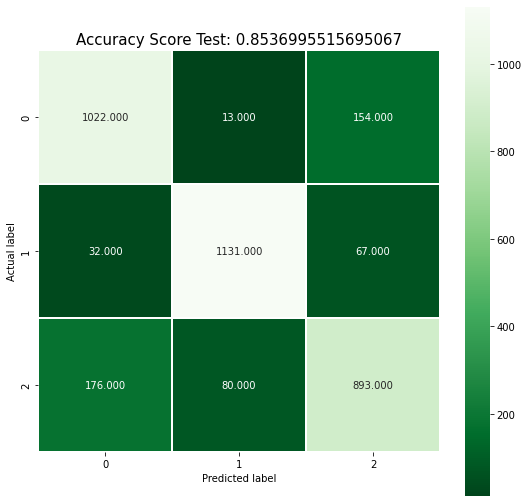

In [ ]:
# Calculate Confusion Matrix for 
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(9,9))

# Heatmap visualization of accuracy
sns.heatmap(cm,annot=True, fmt='.3f', linewidths=.5, square=True,cmap='Greens_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
title = 'Accuracy Score Test: {0}'.format(accuracy_score(y_test, y_pred))
plt.title(title,size=15)

print("\nHyperparameter Tuning Classification Report\n", classification_report(y_test, y_pred))

## PCA with Best Params

In [ ]:
# Dimensionality Reduction with Principal Component Analysis (PCA)
pca = PCA(0.90) # Preserve 90% of the variance

X_transformed = pca.fit_transform(X_train) # Fit the pca transform with X_train
X_test_transformed = pca.transform(X_test) # Apply transform to X_test

# Training set shape after Principal Component Analysis form
print(X_transformed.shape)

# Original Training Set Shape
# Notice we lose 3,943 features using PCA, while preserving 90% variance
print(X_train.shape)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


(14268, 154)
(14268, 4096)


In [ ]:
# Since max features changed with PCA fitting, determine best about of features again
max_features = list(range(1,X_transformed.shape[1]))

for max_feature in max_features:
    dt = DecisionTreeClassifier(max_features=max_feature)
    dt.fit(X_transformed, y_train)
    train_pred = dt.predict(X_transformed)
    y_pred = dt.predict(X_test_transformed)
    
    print("For max feature:", max_feature)
    print('===== Accuracy Train: %.3f' % accuracy_score(y_train, train_pred))
    print('===== Accuracy Test: %.3f' % accuracy_score(y_test, y_pred))
    print("\nClassification Report\n", classification_report(y_test, y_pred))

# 82.2% accuracy with max features 134

For max feature: 1
===== Accuracy Train: 1.000
===== Accuracy Test: 0.437

Classification Report
               precision    recall  f1-score   support

           0       0.47      0.48      0.48      1189
           1       0.44      0.42      0.43      1230
           2       0.40      0.41      0.40      1149

    accuracy                           0.44      3568
   macro avg       0.44      0.44      0.44      3568
weighted avg       0.44      0.44      0.44      3568

For max feature: 2
===== Accuracy Train: 1.000
===== Accuracy Test: 0.511

Classification Report
               precision    recall  f1-score   support

           0       0.56      0.56      0.56      1189
           1       0.52      0.51      0.51      1230
           2       0.45      0.46      0.46      1149

    accuracy                           0.51      3568
   macro avg       0.51      0.51      0.51      3568
weighted avg       0.51      0.51      0.51      3568

For max feature: 3
===== Accuracy Train: 1

In [ ]:
max_depths = np.linspace(1, 32, 32, endpoint=True)

for depth in max_depths:
    # Initialize Classifier with max_depth
    dt = DecisionTreeClassifier(max_depth=depth)
    # Fit Classifier 
    dt.fit(X_transformed, y_train)
    # Train Classifier Prediction
    train_pred = dt.predict(X_transformed)
    # Test Classifier Prediction
    y_pred = dt.predict(X_test_transformed)
    
    print("For max depth:", depth)
    print('===== Accuracy Train: %.3f' % accuracy_score(y_train, train_pred))
    print('===== Accuracy Test: %.3f' % accuracy_score(y_test, y_pred))
    print("\nClassification Report\n", classification_report(y_test, y_pred))

#   Best Performing Depth 77.7%, max-depth=11

For max depth: 1.0
===== Accuracy Train: 0.494
===== Accuracy Test: 0.491

Classification Report
               precision    recall  f1-score   support

           0       0.42      0.92      0.58      1189
           1       0.68      0.54      0.60      1230
           2       0.00      0.00      0.00      1149

    accuracy                           0.49      3568
   macro avg       0.37      0.48      0.39      3568
weighted avg       0.37      0.49      0.40      3568



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For max depth: 2.0
===== Accuracy Train: 0.594
===== Accuracy Test: 0.590

Classification Report
               precision    recall  f1-score   support

           0       0.59      0.71      0.64      1189
           1       0.89      0.49      0.63      1230
           2       0.45      0.57      0.50      1149

    accuracy                           0.59      3568
   macro avg       0.64      0.59      0.59      3568
weighted avg       0.65      0.59      0.60      3568

For max depth: 3.0
===== Accuracy Train: 0.665
===== Accuracy Test: 0.665

Classification Report
               precision    recall  f1-score   support

           0       0.73      0.61      0.66      1189
           1       0.75      0.78      0.76      1230
           2       0.53      0.61      0.57      1149

    accuracy                           0.66      3568
   macro avg       0.67      0.66      0.66      3568
weighted avg       0.67      0.66      0.67      3568

For max depth: 4.0
===== Accuracy Train: 0

In [ ]:
best_max_depth = 11
best_max_feature = 134

# Initialize Decision Trees model for PCA instance with best params
dt = DecisionTreeClassifier(max_features=best_max_feature, max_depth=best_max_depth)

# Use training data to fit Decision Trees model with transformed X_train
dt.fit(X_transformed, y_train.values.ravel())

# make prediction on entire train data
train_pred_pca = dt.predict(X_transformed)
y_pred_pca = dt.predict(X_test_transformed)

print("Best Params")
print("=====Accuracy Train PCA:", accuracy_score(y_train, train_pred_pca))
print("=====Accuracy Test PCA:", accuracy_score(y_test, y_pred_pca))

Best Params
=====Accuracy Train PCA: 0.9414774320156994
=====Accuracy Test PCA: 0.7799887892376681


## Testing Model Bias 

Một bộ dữ liệu bên ngoài sẽ được dùng để kiểm tra và sử dụng làm dữ liệu kiểm tra cho mô hình.
- Test_bias (TB) dataset

Chúng tôi sẽ sử dụng Mô hình cây quyết định với các thông số tốt nhất được phát hiện ở trên.

In [ ]:
# Load TB datasets
pickle_in = open("X_test_bias.pickle", "rb")
TB_X = pickle.load(pickle_in)
pickle_in = open("y_test_bias.pickle", "rb")
TB_y = pickle.load(pickle_in)

# TB target and feature set shape
print("Features, TB_X shape: ", TB_X.shape)
print("Target, TB_y shape: ", TB_y.shape)

Features, TB_X shape:  (509, 64, 64)
Target, TB_y shape:  (509,)


In [ ]:
# Normalize the pixel values
TB_X = TB_y / 255.0

In [ ]:
TB_X.shape

(509,)

In [ ]:
pickle_in = open("data_test.pickle", "rb")
data_test_bias = pickle.load(pickle_in) # 2-D Feature Set, Data matrix will serve as X

In [ ]:
# Get Column Names
cols = []
for i in range(0, len(data_test_bias[0])):
    cols.append("P" + str(i))

# Convert to Dataframe
numpy_data = data_test_bias
X_test_bias = pd.DataFrame(data=numpy_data, columns=[cols])
print(X_test_bias.head())

y_test_bias = pd.DataFrame(data=TB_y, columns=["Mask_Target"])
print(y_test_bias.head())

    P0   P1   P2   P3   P4   P5   P6  ... P4089 P4090 P4091 P4092 P4093 P4094 P4095
0  215  213  214  214  215  215  215  ...    74    82    94   100   109   122   138
1  234  233  229  229  228  238  247  ...    87    69    69    69    71    74    73
2  111  103  110  101   97   85   72  ...   132   126   124   116   123   122   149
3  176  170  166  109   95  117  127  ...    95    98   116   102    98   115   114
4   60   58   58   58   60   67   73  ...    74    66    65    85    80    76    84

[5 rows x 4096 columns]
   Mask_Target
0            0
1            0
2            0
3            0
4            0


In [ ]:
best_max_depth = 10
best_max_feature = 1138

# Re-initialize Decision Trees model with best params and fit it
dt = DecisionTreeClassifier(max_features=best_max_feature, max_depth=best_max_depth)
dt.fit(X_train, y_train.values.ravel())

# make prediction on entire train data
train_pred = dt.predict(X_train)
y_pred = dt.predict(X_test)

# make prediction on the entire TB dataset
y_pred_tb = dt.predict(X_test_bias)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Test bias Classification Report
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       152
           1       0.00      0.00      0.00       144
           2       0.42      1.00      0.59       213

    accuracy                           0.42       509
   macro avg       0.14      0.33      0.20       509
weighted avg       0.18      0.42      0.25       509



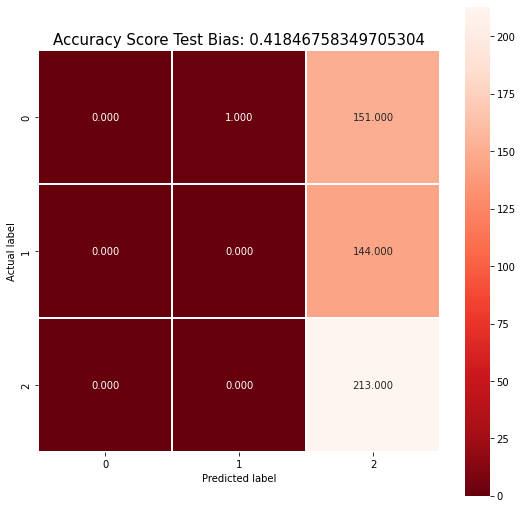

In [ ]:
# Evalutation

# Calculate Confusion Matrix for TB dataset on DT Model
cm = confusion_matrix(TB_y, y_pred_tb)

plt.figure(figsize=(9,9))

# Heatmap visualization of accuracy
sns.heatmap(cm,annot=True, fmt='.3f', linewidths=.5, square=True,cmap='Reds_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
title = 'Accuracy Score Test Bias: {0}'.format(accuracy_score(TB_y, y_pred_tb))
plt.title(title,size=15)

print("\nTest bias Classification Report\n", classification_report(TB_y, y_pred_tb))

# Conclusion

Các nguồn được tham khảo để xây dựng mô hình này:
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- https://medium.com/@mohtedibf/indepth-parameter-tuning-for-decision-tree-6753118a03c3